In [ ]:
# Lead Scoring Case Study:
# Problem Statement: X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines.
## X Education needs help in selecting the leads that are most likely to convert into paying customers. 
### The typical lead conversion rate is 30% and the CEO has given target to enhance lead conversion rate to around 80%.

In [514]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To avoid truncation of columns and rows, Set_option:-

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1200)

In [515]:
# Importing dataset 'Lead' into 'lead_df':-

df_lead = pd.read_csv("Leads.csv")

In [516]:
# STEP 1: UNDERSTANDING AND INSPECTING DATA:
#Let us display head of the dataframe 'df_lead':

df_lead.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [517]:
# Dimension of the dataset:
df_lead.shape

(9240, 37)

In [518]:
#Let us check column wise information:

df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [519]:
# Let us check statistical summary of dataset:

df_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

In [ ]:
## OBSERVATION:
### Form the statistical summary above we can observe that column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' have outliers , since there is significant difference between min and max values.Later by using EDA we will verify.

In [ ]:
# STEP 2: CHECKING DATA QUALITY AND DATA CLEANING:

In [520]:
# Checking datatype of the columns:

df_lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [ ]:
## OBSERVATION: As we see that none of the columns have inconsistent datatype, hence no conversion is required.

In [521]:
# Checking duplicates & dropping the duplicate row:

df_lead.drop_duplicates(subset=None, inplace=True)

In [522]:
# Let us observe the shape of dataset after dropping duplicates:
df_lead.shape

(9240, 37)

In [ ]:
## OBSERVATION: We can see that the shape of dataset before and after dropping duplicate is same hence we can say that there no duplicate values.

In [523]:
## Observation from Lead.csv file: There are some categorical variables having entry called 'Select' which needs to be handled.
### Let us find which columns having entry as 'Select':
cols=list(df_lead.columns)
for i in cols:
    if 'Select' in df_lead[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [ ]:
# OBSERVATION:'Specialization','How did you hear about X Education','Lead Profile' and 'City' have 'Select' entry. Which means the customer have not selected option while filling form.
## So it is better to impute 'Select' entry with 'Null' values.

In [524]:
# Let us impute 'Select' with NaN'  :-

df_lead = df_lead.replace('Select', np.nan)

In [525]:
# After imputing null values let us Check 'Select' level is available or not:-

cols=list(df_lead.columns)
for i in cols:
    if 'Select' in df_lead[i].values:
        print(i)

In [526]:
## Step 2.1 - Let us check Null/Missing values:
### 1. Column wise:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [527]:
### 2. % of Null/Missing values:
round(100*(df_lead.isnull().sum()/len(df_lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
# OBSERVATION:
## 1. Coloumns 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' are having missing value ~45% and these columns are assigned by sales team after call.
## 2. Column 'Lead Quality' can be dropped as it have 51.59% missing values.
## 3. Columns 'How did you hear about X Education' & 'Lead Profile' can also be dropped as it have 78.46% & 74.19% missing values respectively.
## 4. 'City' Column is having 39.71% missing values, if we impute mode or most frequent value for missing value then our data will be biased to an extent. Hence it is better to drop it.
## 5. Columns 'Lead Quality', 'Tags', 'Asymmetrique scores' ,'Lead Profile' & 'Last Notable Activity' are created by the sales team after contacting the leads hence we can drop them.
## 6. For the remaining columns we will do analysis & then decide wheather we will drop it or not.

In [ ]:
## Step 2.2 - Treating Missing values:

In [528]:
## 1. Columns having missing values more than 30%:
columns_missing_30 = df_lead.columns[100*(df_lead.isnull().sum()/len(df_lead)) > 30]
print(columns_missing_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')


In [529]:
column_missing = columns_missing_30.drop('Specialization')

In [530]:
## 2. Let us create a copy of orginal dataframe (While dropping missing value columns the original dataset is unaffected):
df1_lead = df_lead.copy()

In [531]:
# 3. Let us Drop the columns having more than 30% missing values:

df1_lead = df1_lead.drop(column_missing, axis=1).copy()

In [532]:
# 4. Now let us Check dimension of dataset after dropping columns:

df1_lead.shape

(9240, 28)

In [533]:
# 5. Let us check the remaining columns for missing values:

round(100*(df1_lead.isnull().sum()/len(df1_lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

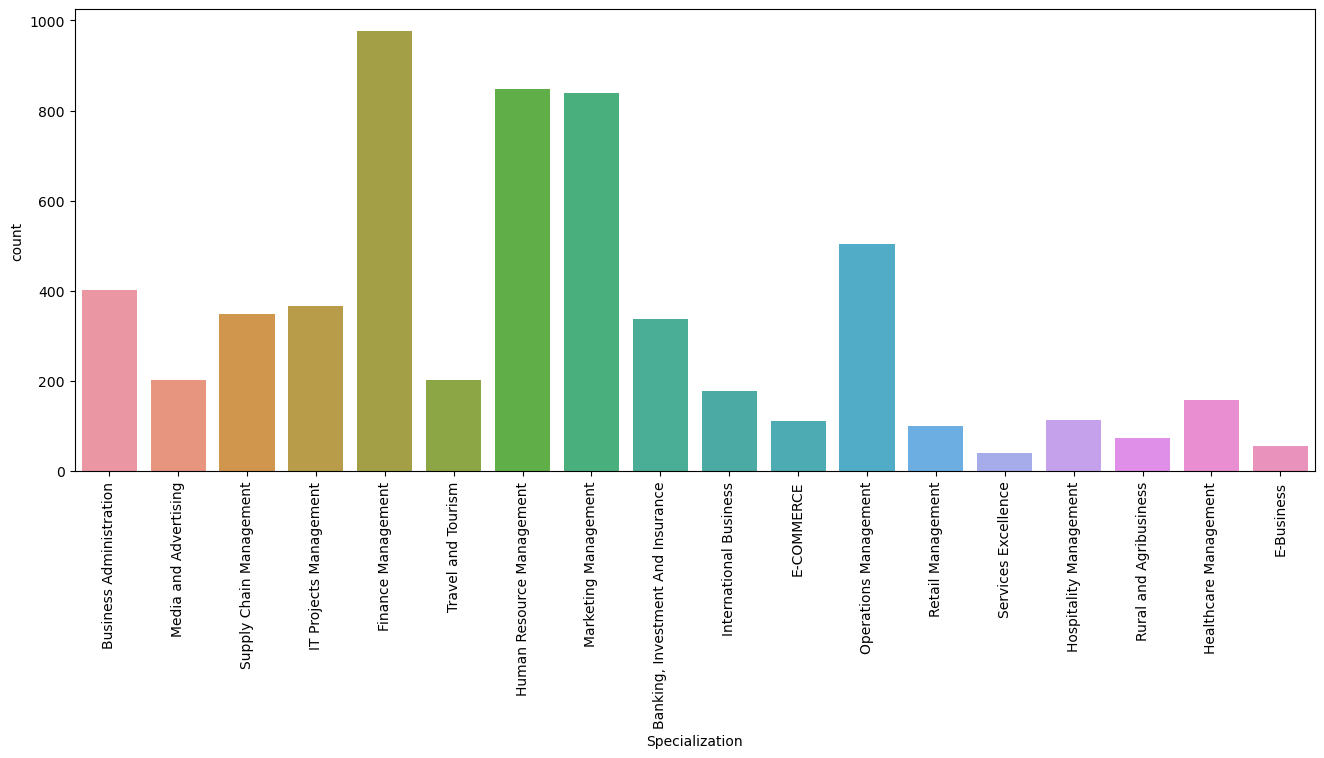

In [534]:
# Count plot of 'Specialization' to see the data distribution:

plt.figure(figsize=(16,6))
sns.countplot(df1_lead['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [535]:
# Let us impute missing value with 'Other':

df1_lead['Specialization'].fillna('Other',inplace=True)

In [536]:
# 6. Let us anlyse columns with missing values <30% : 
## Let us List the columns having missing values into 'missing_remaining':
missing_remaining = df1_lead.columns[(100*(df1_lead.isnull().sum()/len(df1_lead)) < 30) & (100*(df1_lead.isnull().sum()/len(df1_lead)) >0) ]
print(missing_remaining)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course'], dtype='object')


In [537]:
# Let us Check value counts of 'What is your current occupation' variable:

df1_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

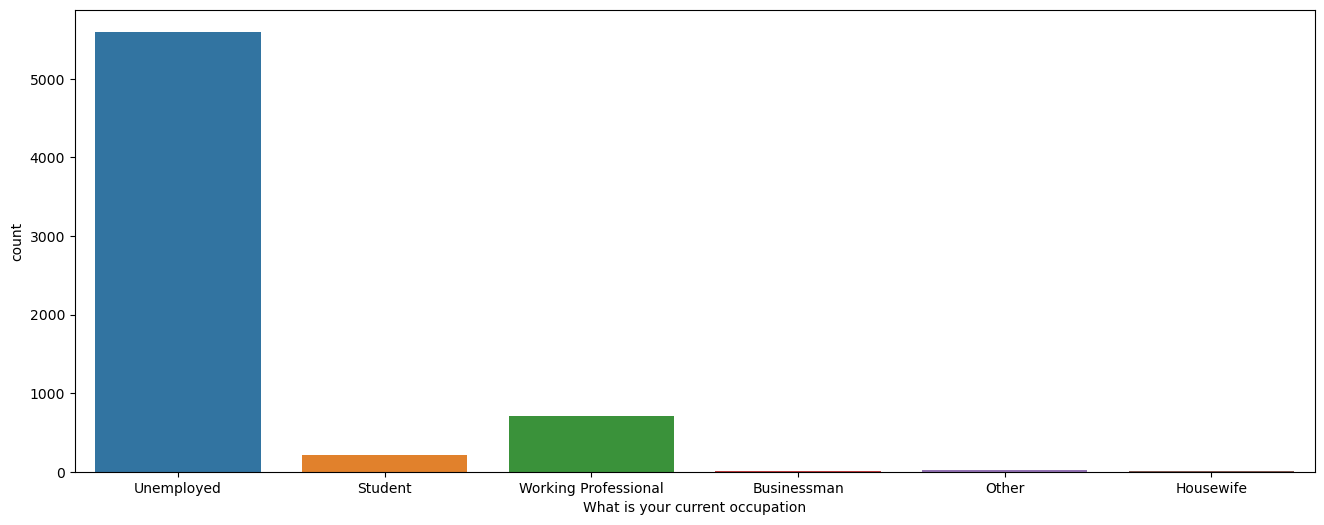

In [538]:
# Count plot to check data in column 'What is your current occupation':-

plt.figure(figsize=(16,6))
sns.countplot(df1_lead['What is your current occupation'])
plt.show()

In [ ]:
## OBSERVATION:
## We can observe that 'Unemployed' count is highest but we will impute missing values with 'Other' considering we do not know current occupation of lead.So let us create a separate category called 'Others'.

In [539]:
# Let us Impute missing value with 'Others' :

df1_lead['What is your current occupation'].fillna('Other',inplace=True)

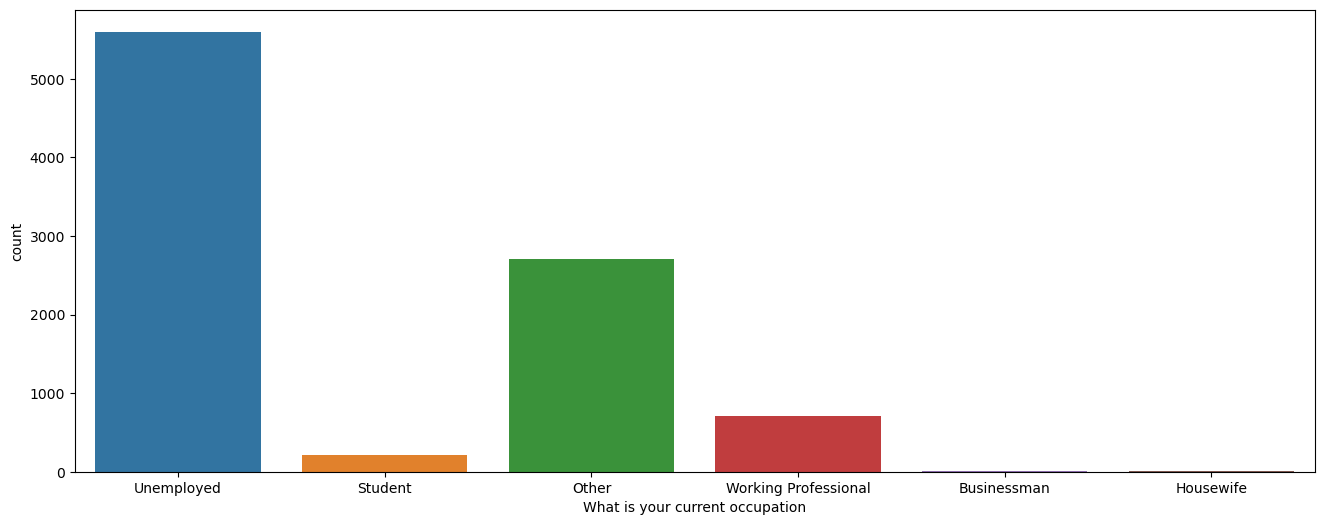

In [540]:
# Checking count of 'Other' after impuataion:

plt.figure(figsize=(16,6))
sns.countplot(df1_lead['What is your current occupation'])
plt.show()

In [541]:
# Let us Check value counts of 'What matters most to you in choosing a course' variable:

df1_lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [ ]:
# OBSERVATION: 'Better Career Prospects' is the most frequent value so we can replace missing value with 'Better Career Prospects'.

In [542]:
# Imputing missing values with 'Better Career Prospects':

df1_lead['What matters most to you in choosing a course'] = df1_lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

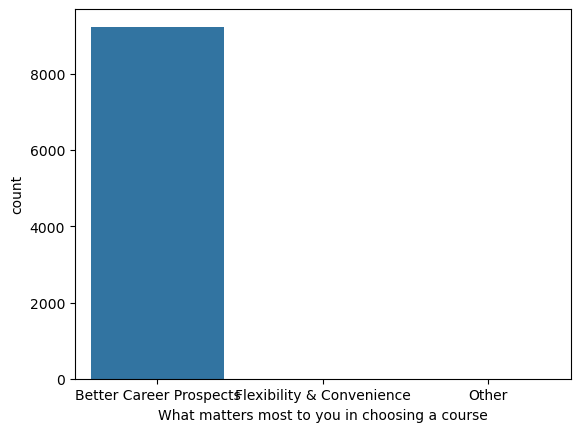

In [543]:
# Let us verify counts by ploting count plot :

sns.countplot(df1_lead['What matters most to you in choosing a course'])
plt.show()

In [544]:
# Let us Check value counts of 'Country' column:-

df1_lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

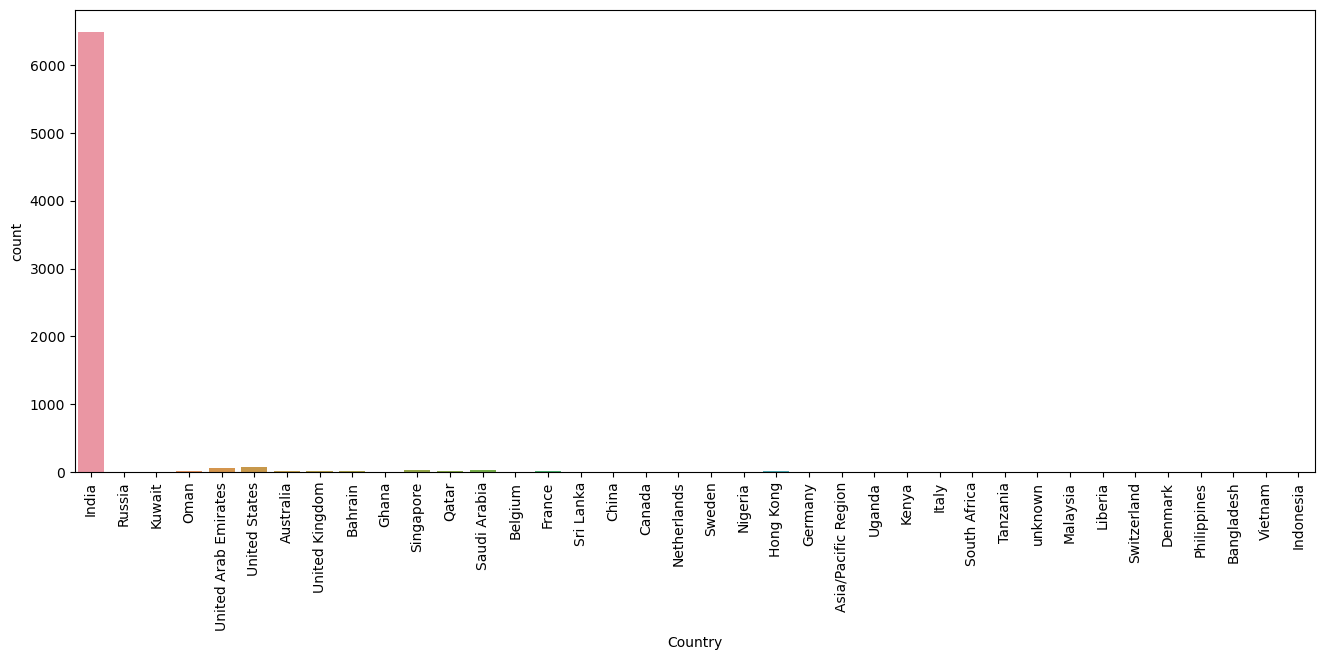

In [545]:
# Let us Plot count plot to visualize counts of data of 'Country' column:

plt.figure(figsize=(16,6))
sns.countplot(df1_lead['Country'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# OBSERVATION: We can see in plot that 'India' count is highest so we can impute missing values with 'India'

In [546]:
# Let us Replace missing values with most frequent value 'India' in categorical column 'Country':

df1_lead.Country.fillna('India',inplace=True)

In [547]:
df1_lead.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

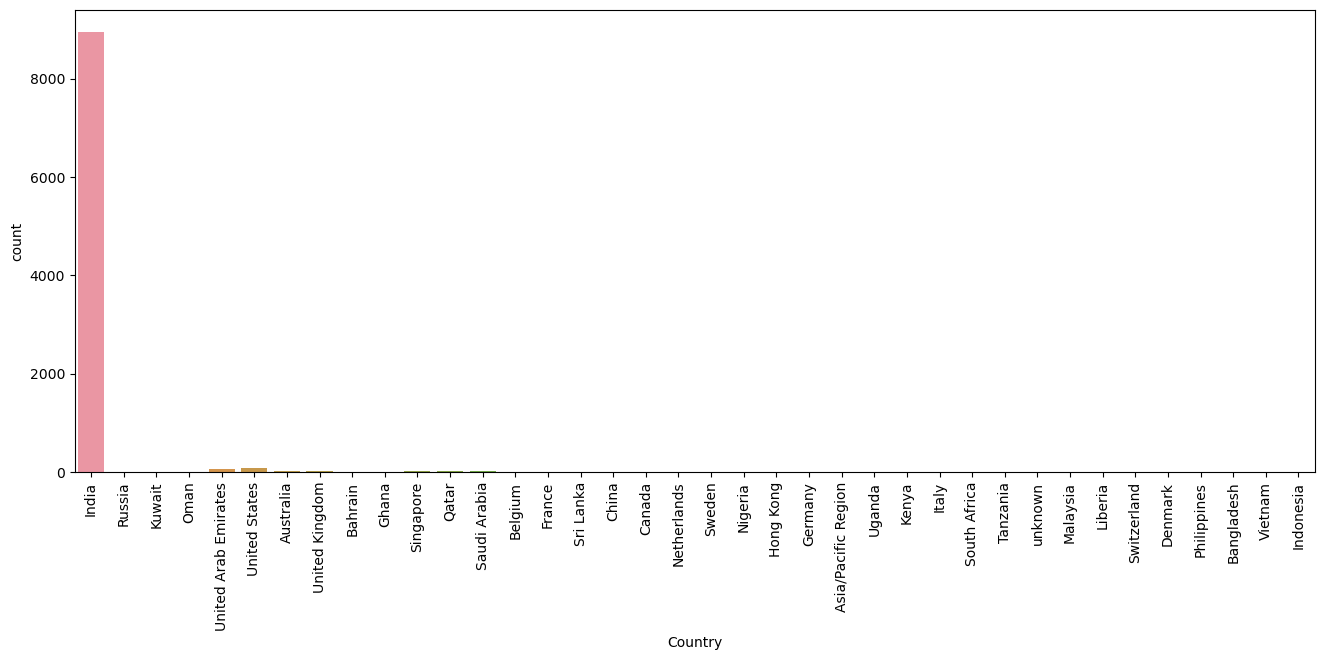

In [548]:
# Let us verify by plotting count plot after imputation:

plt.figure(figsize=(16,6))
sns.countplot(df1_lead['Country'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# OBSERVATION: Before imputating in column 'Country' % of 'india' was ~70% but after imputing missing values with 'India' it's % became ~96% ,therefore it will not contribute much in analysis so better to drop it cause data is skewed here.

In [549]:
# Let us Drop 'Country' column from dataframe:

df1_lead.drop('Country',1,inplace=True)

In [550]:
# Let us check value counts of 'Lead Source':

df1_lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
# OBSERVATION: 
## we can see from the above data that there are two 'Google' and 'google' ,so let us replace 'google' with 'Google'.
## Also 'Google' is having highest number occurance so let us impute missing values with 'Google'.

In [551]:
# Let us replace 'google' with 'Google' :

df1_lead['Lead Source']=df1_lead['Lead Source'].replace('google','Google')

In [552]:
# Now let us Verify value counts again:

df1_lead['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [553]:
# Next, now let us Impute missing values with 'Google':

df1_lead['Lead Source'].fillna('Google',inplace=True)

In [ ]:
# 7. Let us get into treating ~1% missing value columns:

In [554]:
# Let us Check value counts of 'Last Activity':

df1_lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
# OBSERVATION: Since we do not know the last activity of leads which are the missing values and the most frequent value is 'Email Opened' so let us impute missing value with 'Email Opened'.

In [555]:
# Imputing missing values with 'Email Opened':

df1_lead['Last Activity'] = df1_lead['Last Activity'].replace(np.nan, 'Email Opened')

In [556]:
# Let us now Impute missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns:

df1_lead['TotalVisits'].fillna(df1_lead['TotalVisits'].median(), inplace=True)

df1_lead['Page Views Per Visit'].fillna(df1_lead['Page Views Per Visit'].median(), inplace=True)

In [557]:
# Let us now check shape of the dataframe:

df1_lead.shape

(9240, 27)

In [558]:
# Checking missing values after treating missing values:-

round(100*(df1_lead.isnull().sum()/len(df1_lead)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [ ]:
# OBSERVATION: We can observe that there is no missing values now,so we can proceed with next task.

In [559]:
## Let us check 'Prospect ID' and 'Lead Number' columns:
## 1. Prospect ID:
df1_lead.duplicated(subset = 'Prospect ID').sum()

0

In [560]:
## 2. Lead Number:
df1_lead.duplicated(subset = 'Lead Number').sum()

0

In [ ]:
# OBSERVATION: 'Prospect ID' &'Lead Number' do not have duplicate values means these columns identify that each data uniquely, so working as unique Id will not make any significant impact on our model.So we can drop it.

In [561]:
# Let us Drop 'Prospect ID' and 'Lead Number' variables:
df1_lead.drop(['Prospect ID','Lead Number'],1,inplace = True)

In [562]:
# Value_counts of variables to check data balancing:
## # Checking the value_counts of remaining variables for better data understanding :
cols=list(df1_lead.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(df1_lead[i].value_counts(), '\n')

Lead Origin =====
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Lead Source =====
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email =====
No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Do Not Call =====
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Converted =====
0    5679
1    3561
Name: Converted, dtype: in

In [ ]:
# OBSERVATION: We can observe from the above value_counts data that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',' Get updates on DM Content','I agree to pay the amount through cheque' are having highly imbalance data or skewed data and these variables will not contribute significatly to analysis ,so better to drop these columns.

In [563]:
# Let us Drop variables which are having imbalanced data:

df1_lead.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

In [564]:
# Now let us drop column 'last Notable Activity':

df1_lead.drop('Last Notable Activity',1,inplace=True)

In [565]:
# Now let us check shape of the dataframe after dropping variables:

df1_lead.shape

(9240, 11)

In [566]:
# Let us now see the head of 'df1_lead' dataframe :

df1_lead.head()

Lead Origin     Lead Source Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation A free copy of Mastering The Interview
0                      API      Olark Chat           No          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed                                     No
1                      API  Organic Search           No          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                                     No
2  Landing Page Submission  Direct Traffic           No          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                    Yes
3  Landing Page Submission  Direct Traffic           No          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                     No
4  Landing Page Submission          Google           No          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed                                     No

In [ ]:
# STEP 3 :   EXPLORATORY DATA ANALYSIS (EDA):
## STEP 3.1 :UNIVARIATE ANALYSIS:
## As per problem statement 'Converted' is our target variable.

## The target variable, Indicates whether a lead has been successfully converted or not.
###    0: Not converted into lead.
###    1: Lead has been successfully Converted.

In [567]:
## Let us calculate the CONVERSION RATE:
Converted = (sum(df1_lead['Converted'])/len(df1_lead['Converted'].index))*100
Converted

38.53896103896104

In [568]:
# 1. Now let us check distribution of 'TARGET' variables.
## Value count of taregt variable 'converted':
df1_lead.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

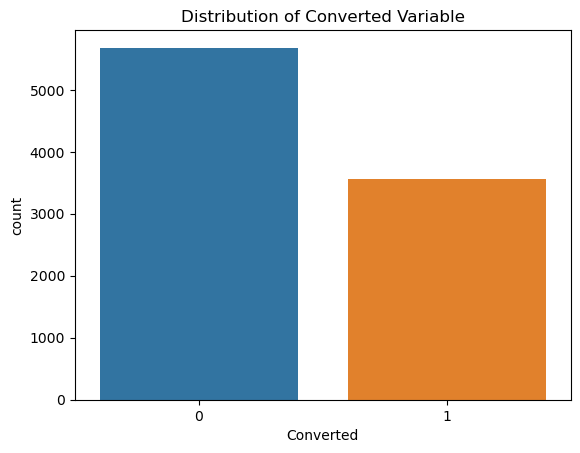

In [569]:
# Now let us plot count plot to get clear view of data distribution of 'Converted' column:

sns.countplot(df1_lead.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [570]:
# Let us Check ratio of imbalance:

(df1_lead.Converted==1).sum()/(df1_lead.Converted==0).sum()

0.6270470153195985

In [ ]:
# OBSERVATION: We can observe from value count and count plot that data is properly balanced with respect to ratio.

In [571]:
# Let us again checking data types of remaining columns:

df1_lead.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

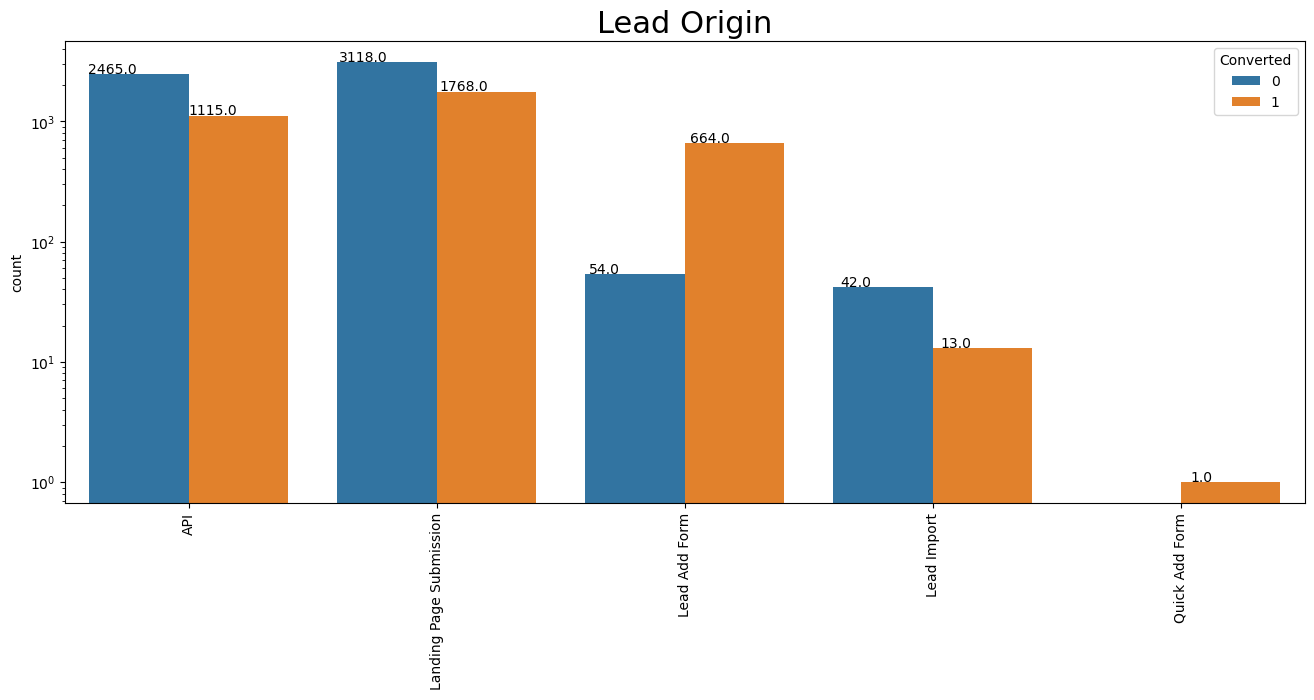

In [572]:
## 2. Analyzing Categorical Variables:
## Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1 :
plt.figure(figsize = (16,6))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=22)
ax.set_yscale('log')

plt.show()

In [ ]:
# OBSERVATION: We can observe & calculate from the plot that:
# a. Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
# b. For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
# c. Count of 'Lead Import' is lesser.

In [ ]:
## RECOMMENDATION: 
###   To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form

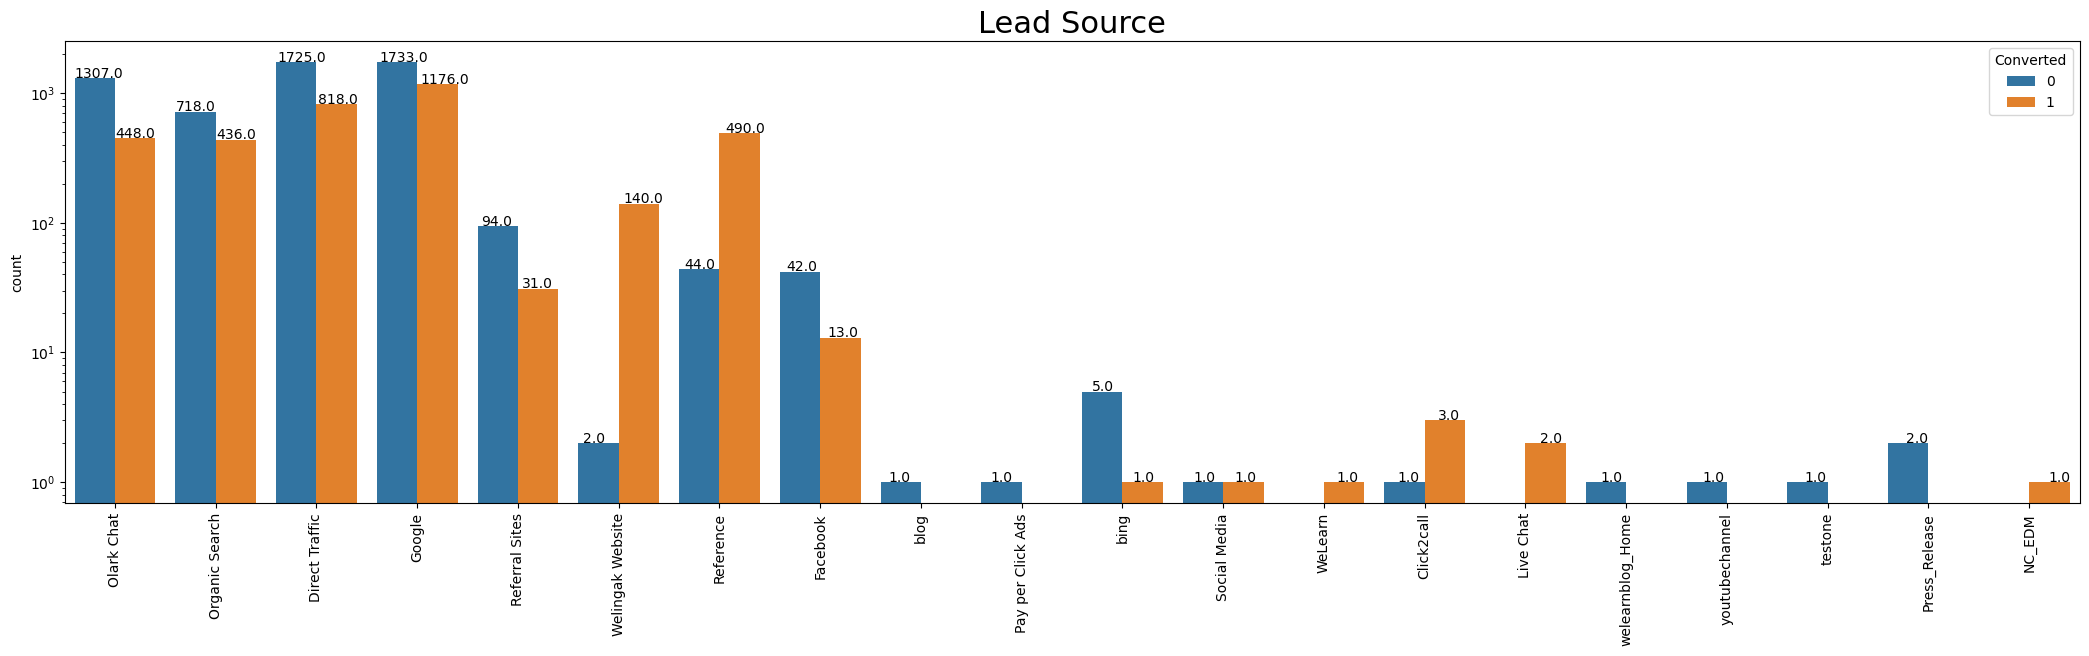

In [573]:
# Let us plot count plot of 'Lead Source' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (26,6))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=22)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [ ]:
## Clubbing lower frequency values together under a common label 'Others'

In [574]:
# Combining all low frequency values together:-

df1_lead['Lead Source'] = df1_lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

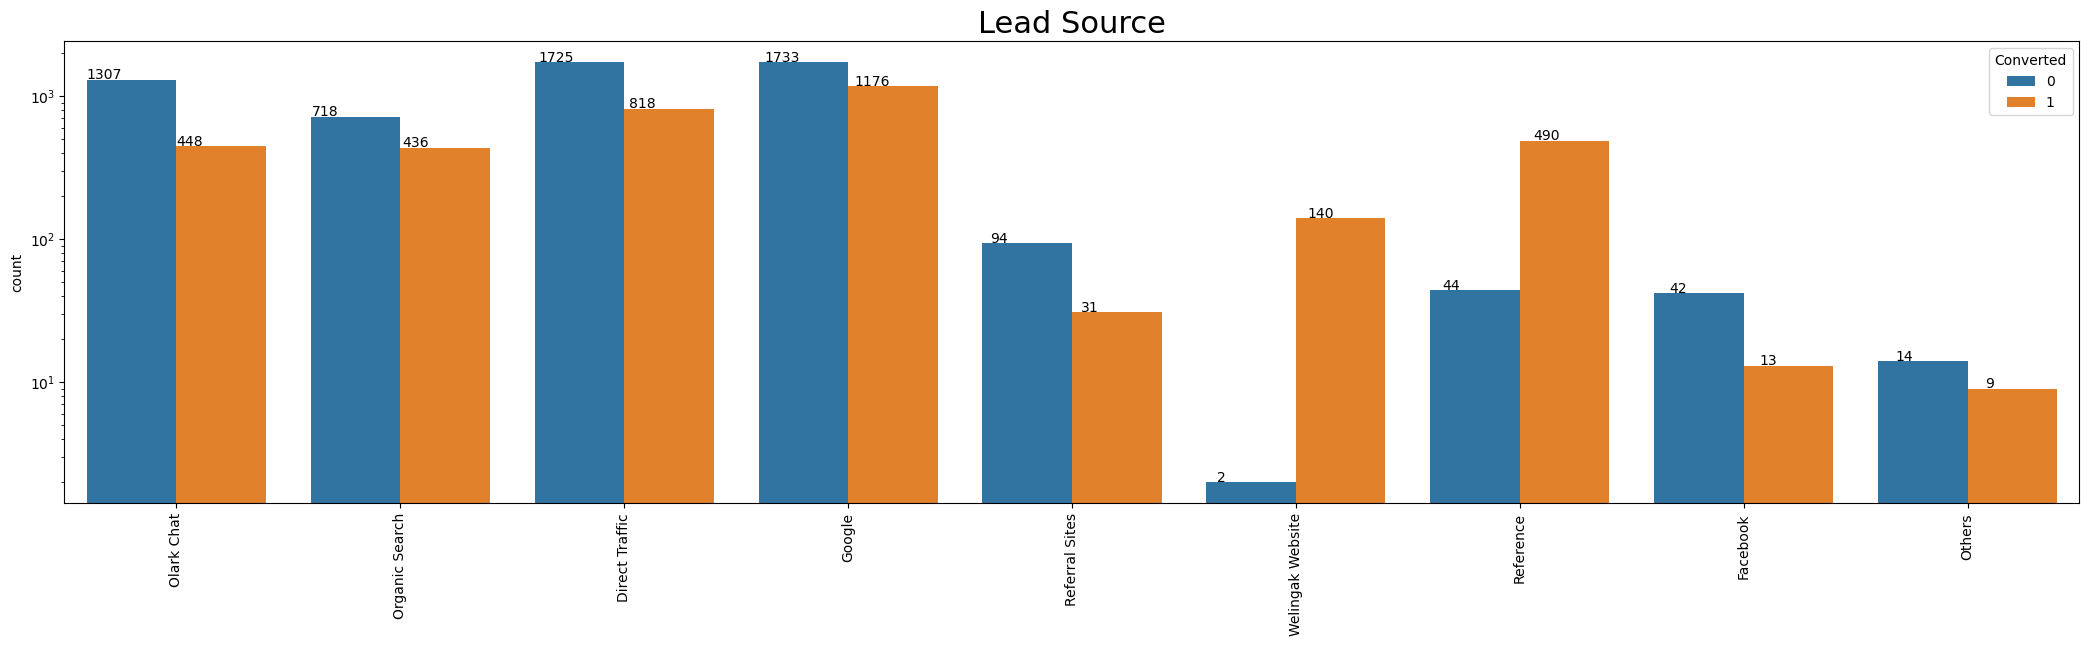

In [575]:
# Let us again plot count plot of 'Lead Source' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (26,6))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=22)

ax.set_yscale('log')

plt.show()

In [ ]:
# OBSERVATION: 
## From above plot we can observe:
## a. Google and Direct traffic generates maximum number of leads.
## b. Conversion rate of 'Reference' and 'Welingak Website' leads is high.

In [ ]:
# RECOMMENDATION: 
## To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

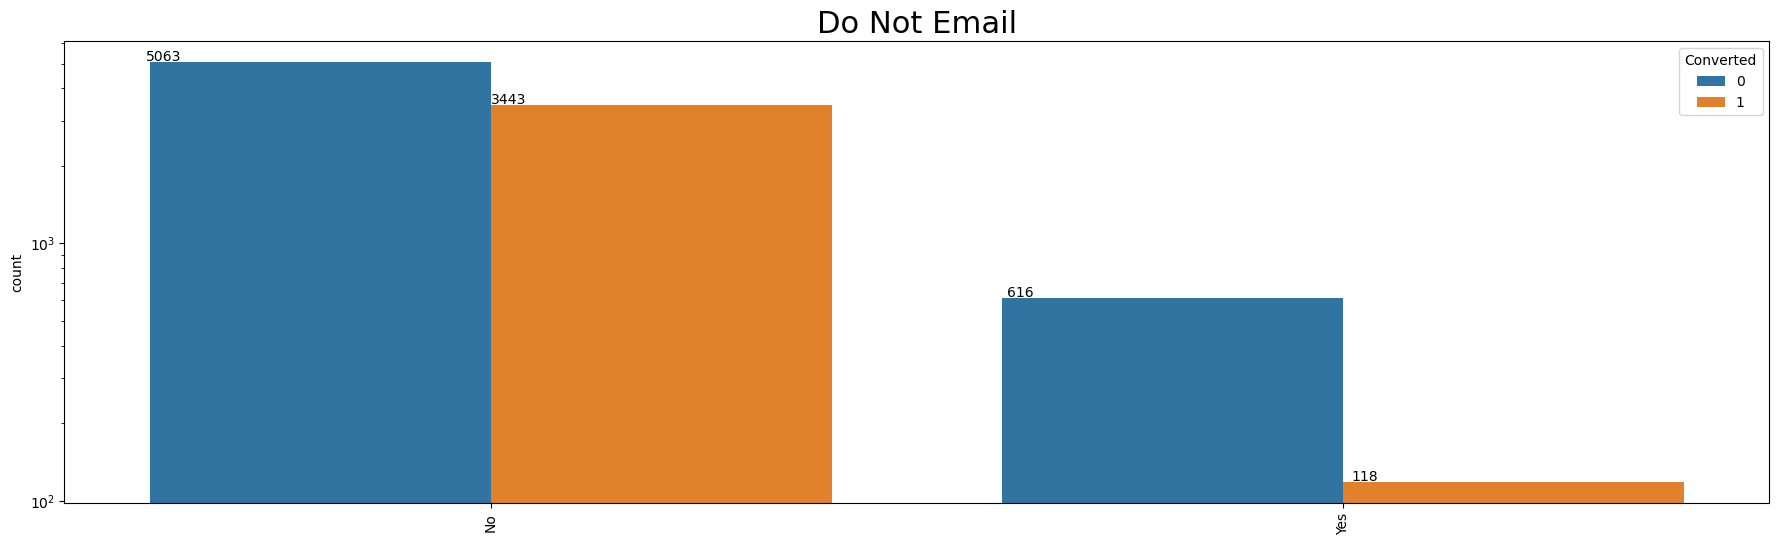

In [576]:
# Let us plot count plot of 'Lead Source' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (22,6))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=22)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [ ]:
# OBSERVATION: People who opted for mail option are becoming more leads.

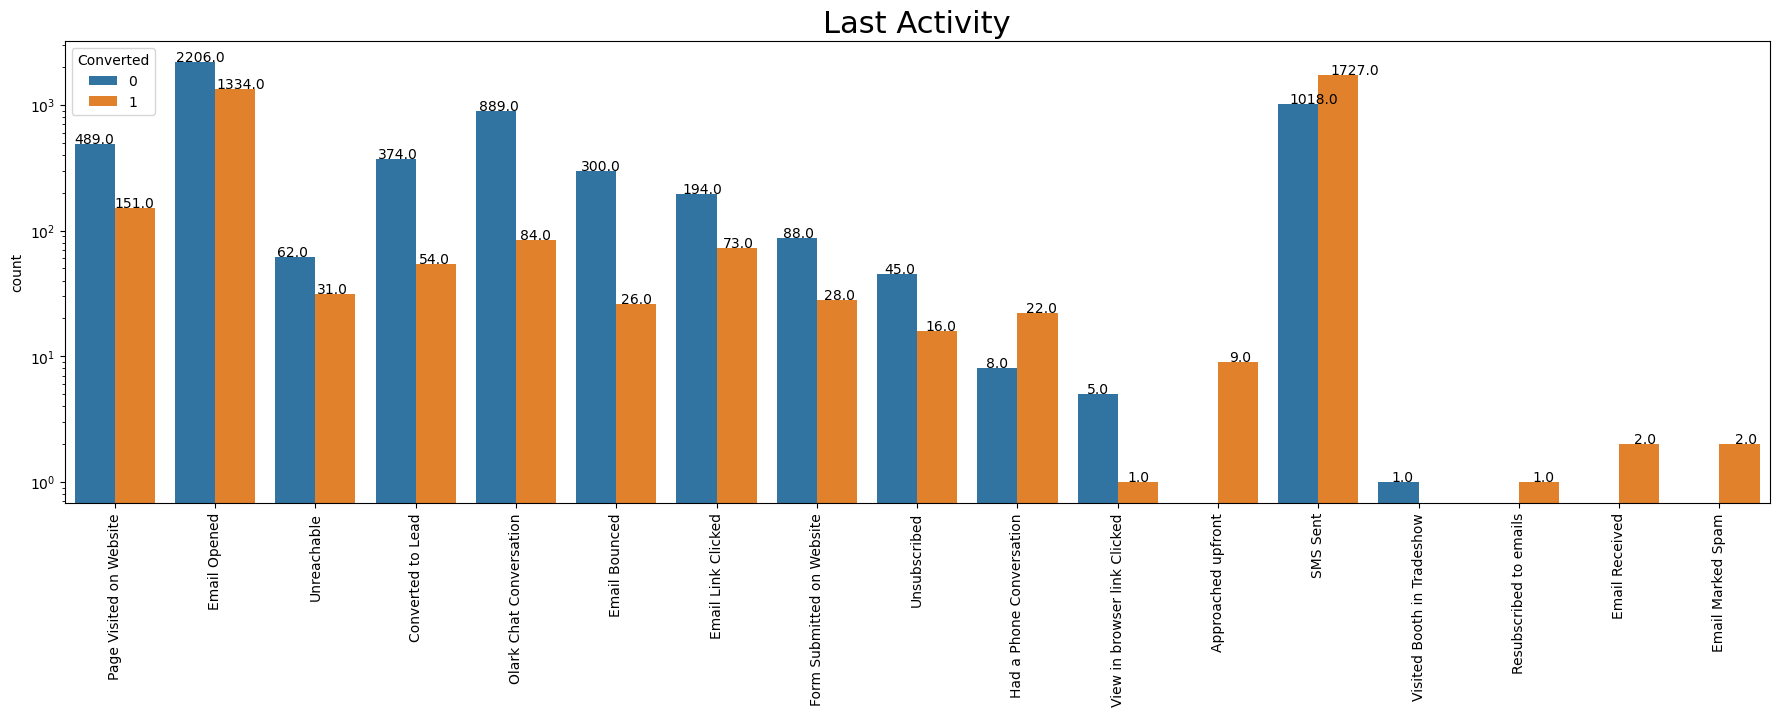

In [577]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (22,6))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=22)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [578]:
# Combining all low frequency values together under label 'Others':

df1_lead['Last Activity'] = df1_lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

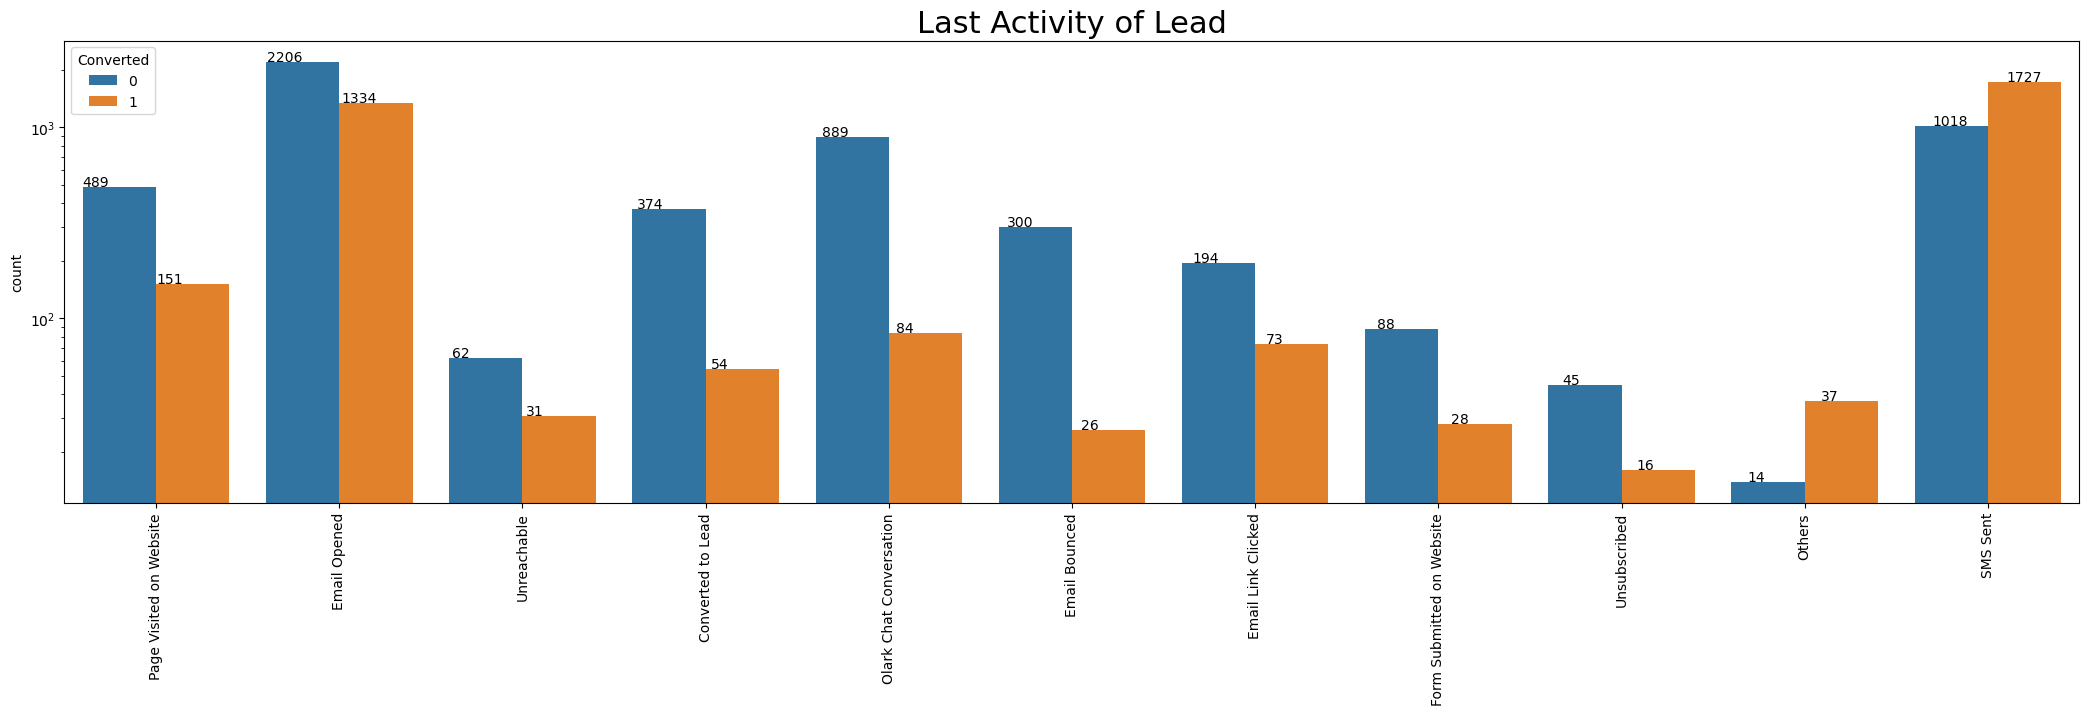

In [579]:
# Again plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (26,6))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity of Lead',fontsize=22)

ax.set_yscale('log')

plt.show()

In [ ]:
# OBSERVATION:
## From above plot we can observe :
## a. Conversion rate for last activity of 'SMS Sent'is ~63%.
## b. Highest last activity of leads is 'Email Opened'.

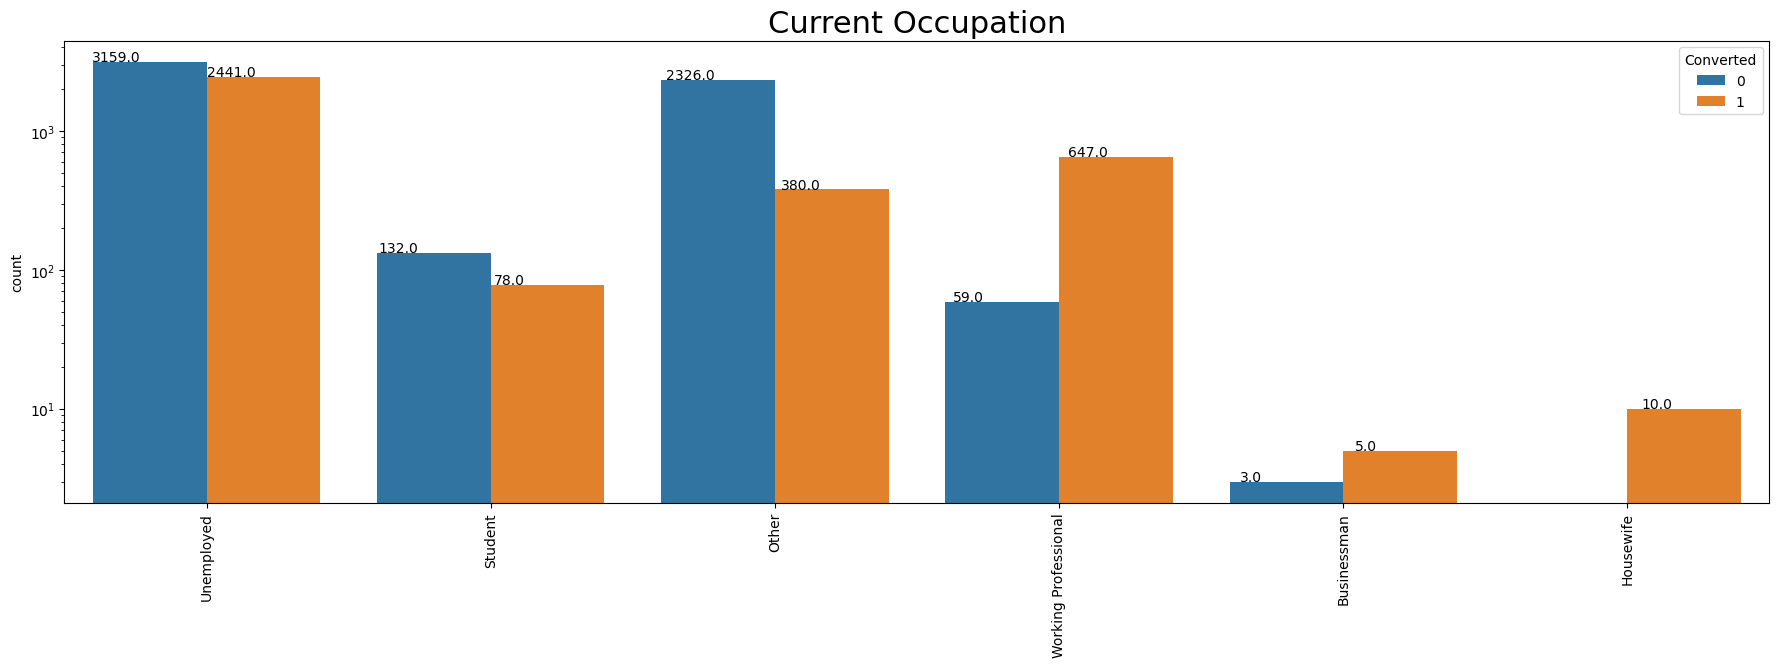

In [580]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (22,6))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=22)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()


In [ ]:
# OBSERVATION: 
## 1. 'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.
## 2. Conversion rate is higher for 'Working Professionals' .

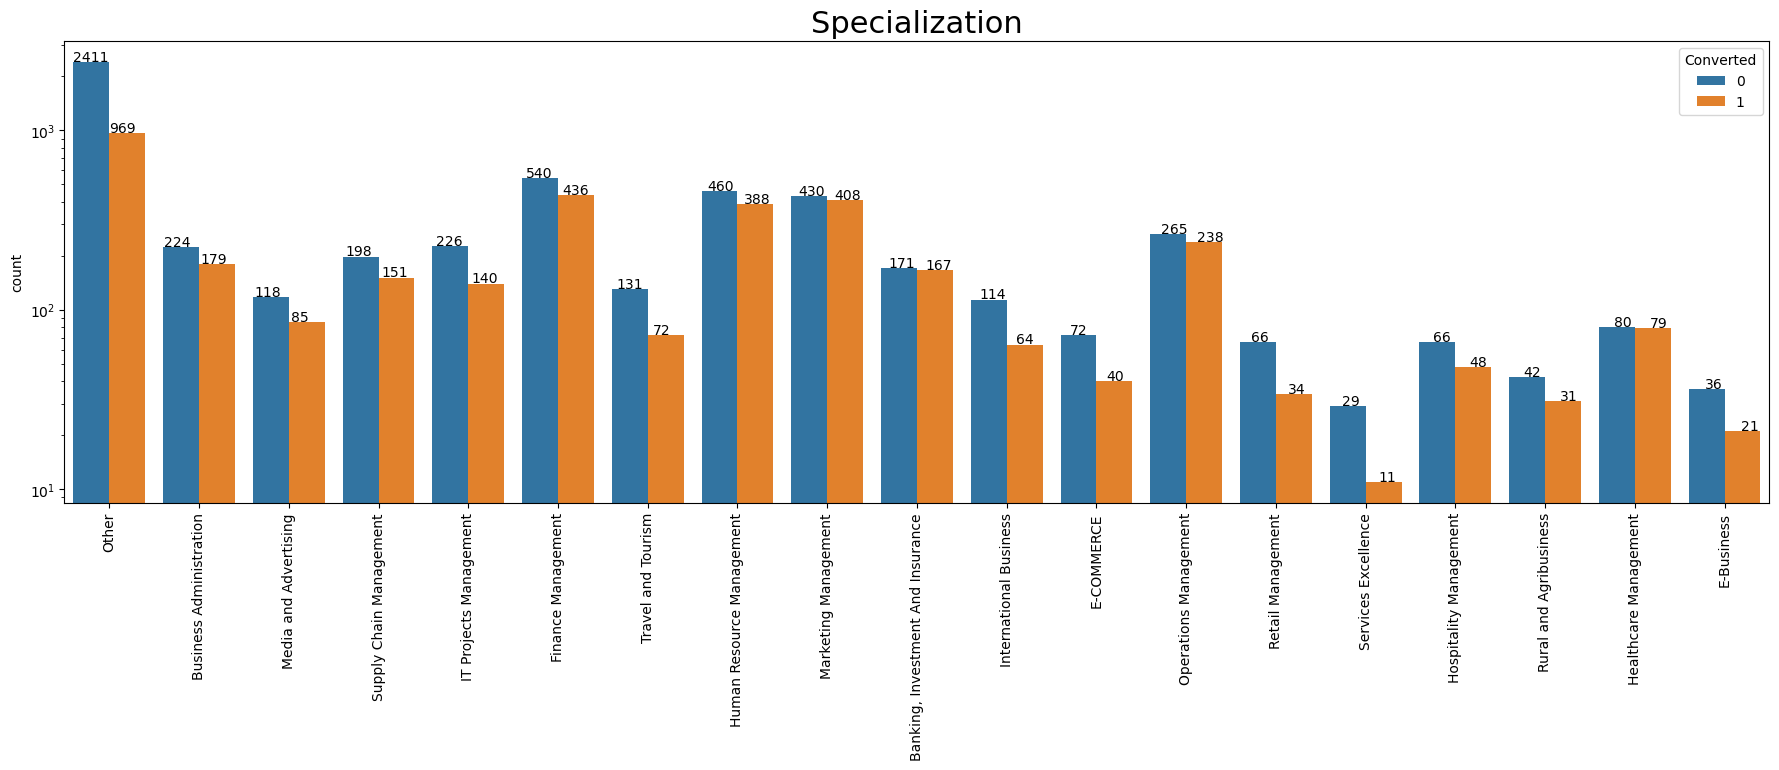

In [581]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 :

plt.figure(figsize = (22,6))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = df1_lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=22)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [ ]:
# OBSERVATION: We can observe from above count plot of 'Specialization' that 'Management' specialization altogether having more number of leads generating.And Other category is also generating more number of leads.

In [ ]:
## 3. Analyzing Numerical Variables.
## Outlier Analysis and treatment.

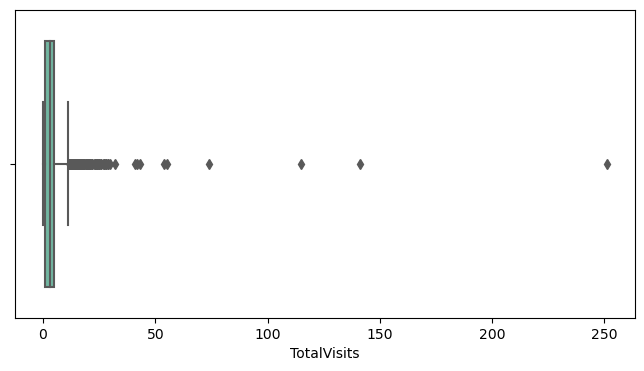

In [582]:
# Let us Plot box plots to visualize data distribution of 'TotalVisits':

plt.figure(figsize = (8,4))
sns.boxplot(df1_lead['TotalVisits'],orient='v',palette='Set2')

plt.show()

In [ ]:
# OBSERVATION:
## We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [583]:
# Let us Treat outliers by capping upper range to 0.99 :

Q3 = df1_lead.TotalVisits.quantile(0.99)

df1_lead = df1_lead[(df1_lead.TotalVisits <= Q3)]

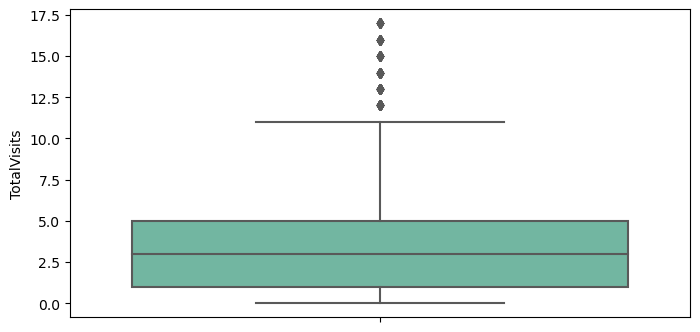

In [584]:
# Verifying outliers after removing it :

plt.figure(figsize = (8,4))
sns.boxplot(y=df1_lead['TotalVisits'],palette='Set2')
plt.show()

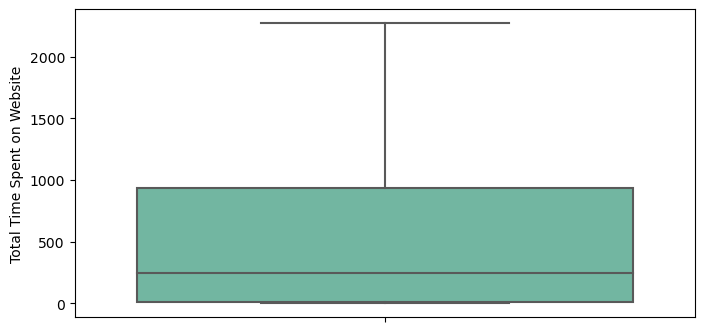

In [585]:
# Let us plot box plots to visualize data distribution of 'Total Time Spent on Website':

plt.figure(figsize=(8,4))
sns.boxplot(y=df1_lead['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

In [ ]:
# OBSERVATION:
## From above box plot we can see that there is no outlier in data,so no trreatment required for it.

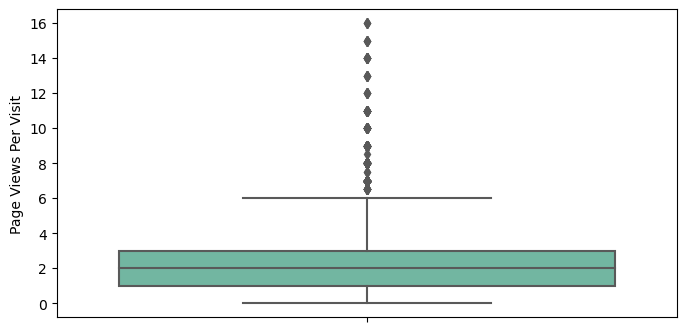

In [586]:
# Let us plot box plots to visualize data distribution of 'Page Views Per Visit':

plt.figure(figsize=(8,4))
sns.boxplot(y=df1_lead['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

In [ ]:
# OBSERVATION:
## We can see from above box plot that only upper range outliers are present in data, so need to lower range treat outliers.

In [587]:
# Treating upper range outliers by capping upper range to 0.99:

Q3 = df1_lead['Page Views Per Visit'].quantile(0.99)

df1_lead = df1_lead[(df1_lead['Page Views Per Visit'] <= Q3)]

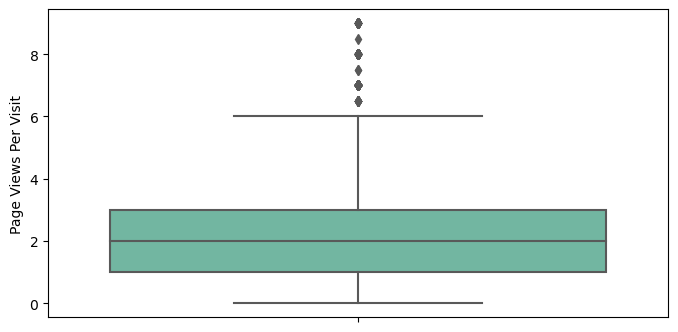

In [588]:
# Verifying outliers after removing it :

plt.figure(figsize = (8,4))
sns.boxplot(y=df1_lead['Page Views Per Visit'],palette='Set2')
plt.show()

In [ ]:
## STEP 3.2 :BIVARIATE ANALYSIS:

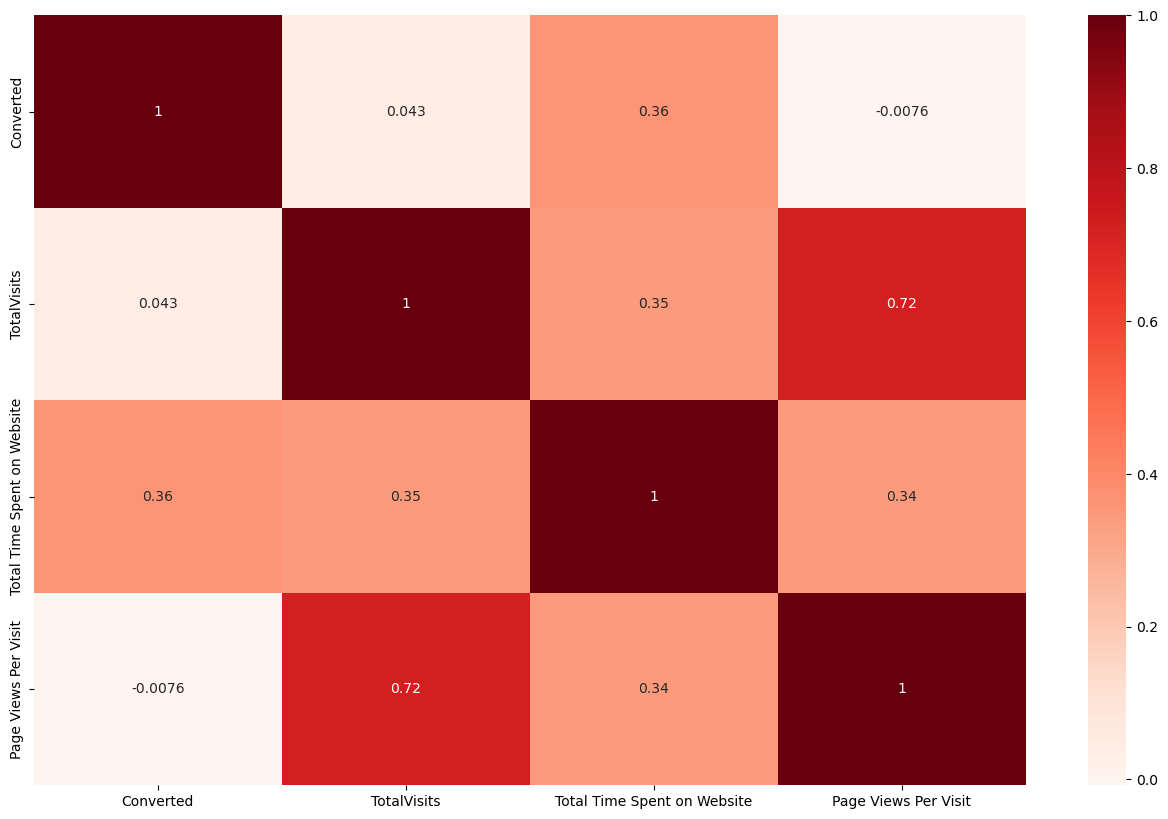

In [589]:
# Heatmap to understand the attributes correlation:

plt.figure(figsize = (16,10))        
ax = sns.heatmap(df1_lead.corr(),annot = True,cmap='Reds')

In [ ]:
# OBSERVATION:
## 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of 0.72
## 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

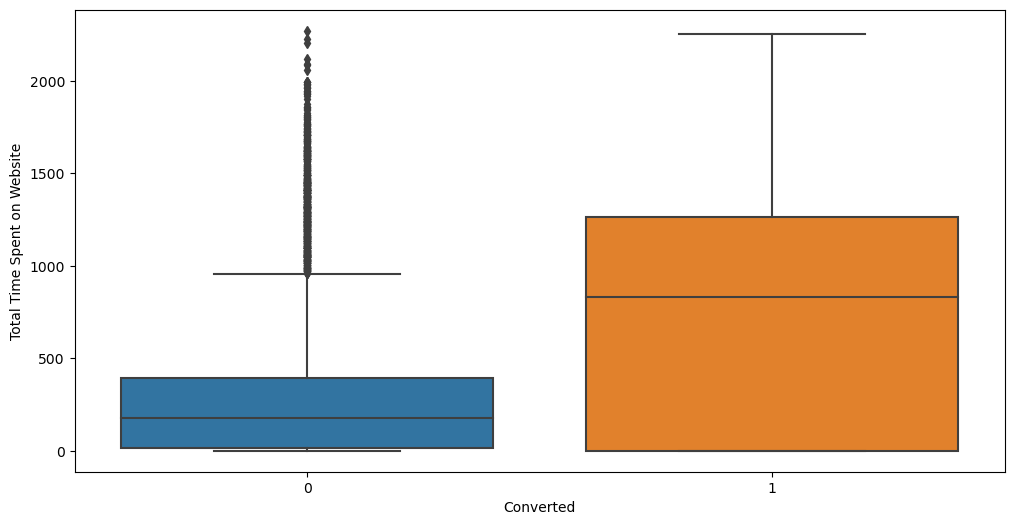

In [590]:
# Let us plot box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:

plt.figure(figsize=(12,6))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=df1_lead)
plt.show()

In [ ]:
# OBSERVATION: Leads spending more time on website are more likely to opt for curses or converted.

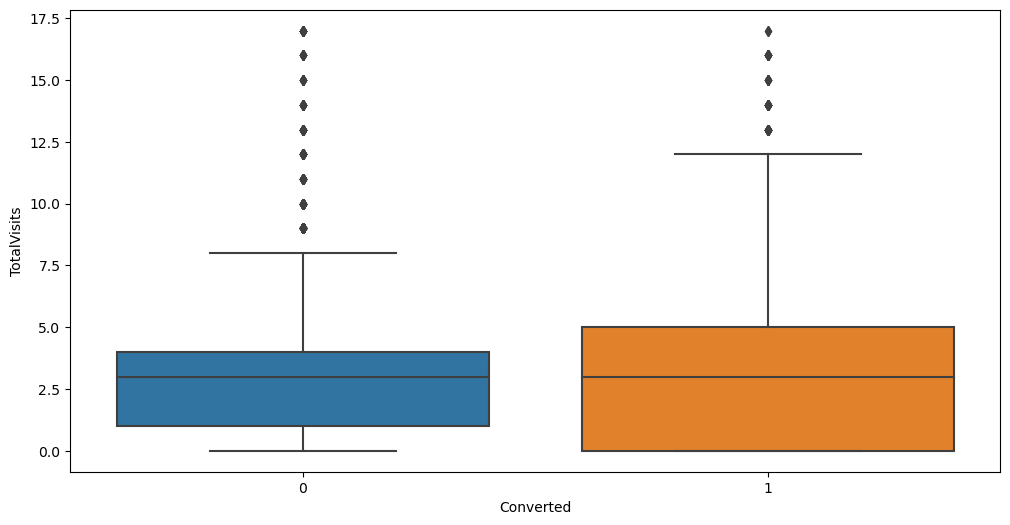

In [591]:
# Plotting box of "Total Visits" vs Converted variable to check data distribution:

plt.figure(figsize=(12,6))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df1_lead)
plt.show()

In [ ]:
# OBSERVATION: From above plot we can see that median for converted and non-converted is approx same.

In [ ]:
# STEP 4: DATA PREPARATION:
## Converting some binary variables (Yes/No) to 0/1

In [592]:
# Variable to map:

var =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable:

df1_lead[var] = df1_lead[var].apply(binary_map)

In [593]:
# Let us check head of dataframe again:

df1_lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation  A free copy of Mastering The Interview
0                      API      Olark Chat             0          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed                                       0
1                      API  Organic Search             0          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                                       0
2  Landing Page Submission  Direct Traffic             0          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student                                       1
3  Landing Page Submission  Direct Traffic             0          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                                       0
4  Landing Page Submission          Google             0          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed                                       0

In [ ]:
# Step 4.1 : Creating Dummy Variable
## For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [594]:
# Creating list 'col_cat' of categorical columns :

col_cat= df1_lead.select_dtypes(include=['object']).columns
col_cat

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'], dtype='object')

In [595]:
# Let us now create dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True':

dummy = pd.get_dummies(df1_lead[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                 

In [596]:
# Adding dummy variables dataset 'dummy' to original dataset 'df1_lead':

df1_lead= pd.concat([dummy,df1_lead],axis = 1)

In [597]:
#Checking head of dataframe 'df1_lead':-

df1_lead.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                 

In [598]:
# Dropping repeated columns for which dummy variables were created:

df1_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Specialization'
                             ],1,inplace = True)

In [599]:
# Let us know check shape of 'df1_lead' dataframe:

df1_lead.shape

(9090, 51)

In [600]:
# Let us check data types column wise again:

df1_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 1   Lead Origin_Lead Add Form                             9090 non-null   uint8  
 2   Lead Origin_Lead Import                               9090 non-null   uint8  
 3   Lead Origin_Quick Add Form                            9090 non-null   uint8  
 4   Lead Source_Facebook                                  9090 non-null   uint8  
 5   Lead Source_Google                                    9090 non-null   uint8  
 6   Lead Source_Olark Chat                                9090 non-null   uint8  
 7   Lead Source_Organic Search                            9090 non-null   uint8  
 8   Lead Source_Others                                    9090

In [ ]:
### We can see that you have all variables as numeric.

In [ ]:
# STEP 5: Test-Train Split:

In [601]:
# Importing required library to split data:

from sklearn.model_selection import train_test_split

In [602]:
# Let us Put feature variable to X:

X = df1_lead.drop(['Converted'], axis=1)

# Let us Display head :

X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  \
0                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            0                                 0                           0                                        0                                      0                     0                                      1                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
1                                    0                          0                        0                           0                     0                   0                       0                           1                   0                      0                           0                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      0                                        0                                           1                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
2                                    1                          0                        0                           0                     0                   0                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                                 

In [603]:
# Let us Put response variable to y:-

y = df1_lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [604]:
# Now let us Split the data into train and test of 70:30 ratio:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [605]:
# Check- Shape of 'X_train' dataset after splitting:

X_train.shape

(6363, 50)

In [606]:
# Check- Shape of 'X_test' dataset after splitting:

X_test.shape

(2727, 50)

In [607]:
# Verifying info of data set after splitting:

df1_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 1   Lead Origin_Lead Add Form                             9090 non-null   uint8  
 2   Lead Origin_Lead Import                               9090 non-null   uint8  
 3   Lead Origin_Quick Add Form                            9090 non-null   uint8  
 4   Lead Source_Facebook                                  9090 non-null   uint8  
 5   Lead Source_Google                                    9090 non-null   uint8  
 6   Lead Source_Olark Chat                                9090 non-null   uint8  
 7   Lead Source_Organic Search                            9090 non-null   uint8  
 8   Lead Source_Others                                    9090

In [ ]:
# STEP 6: FEATURE SCALING
## Let us use 'StandardScaler' here for scaling:

In [608]:
##Importing required library for scaling :

from sklearn.preprocessing import StandardScaler

In [609]:
# Creating 'scaler' object for 'StandardScaler':

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Welingak Website  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  \
302                                     0                          0                        0                           0                     0                   0                       0                           0                   0                      0                           1                             0                            0                                 0                           1                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      1                                        0                                           0                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
6087                                    0                          0                        0                           0                     0                   0                       1                           0                   0                      0                           0                             0                            1                                 0                           0                                        0                                      0                     0                                      0                       0                          0                           0                                          0                                      1                                        0                                           0                                                  0                                          0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
1033                                    0                          0                        0                           0                     0                   1                       0                           0                   0                      0                           0                             0                            0                                 0                           1                                        0                        

In [ ]:
# LET US CHECK THE CORRELATION MATRIX.

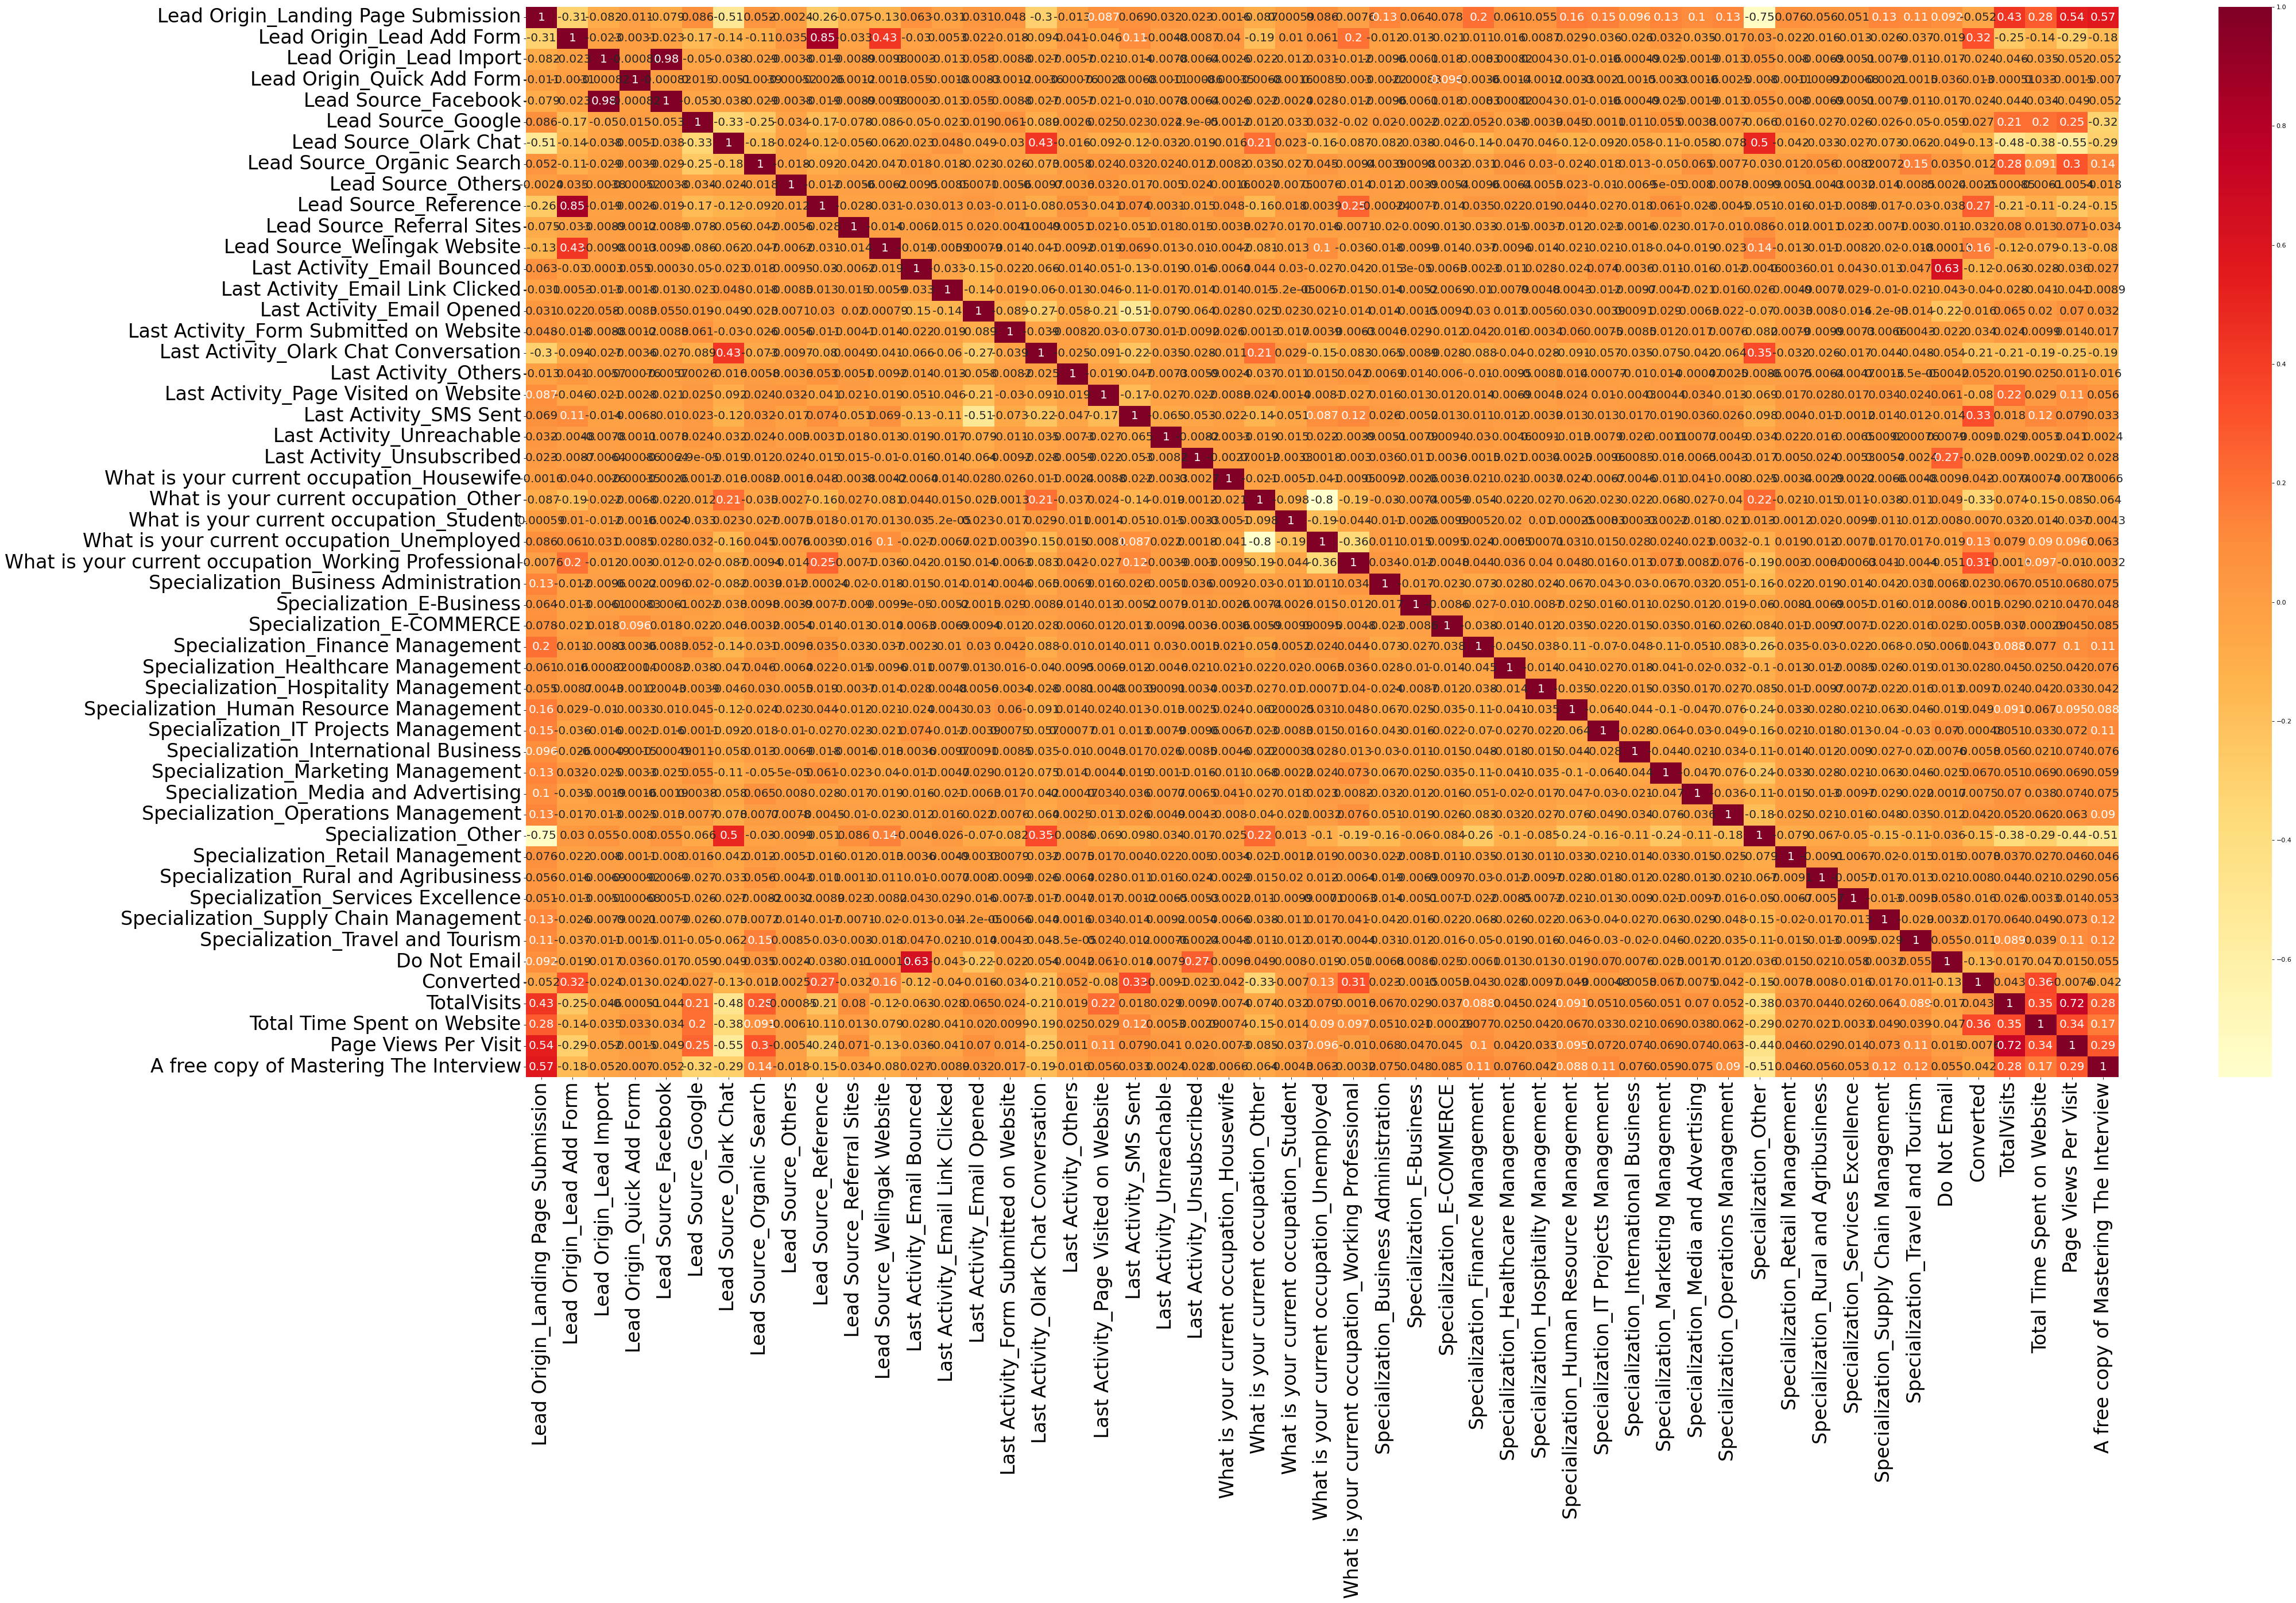

In [622]:
# Checking the correlation coefficients to see which variables are highly correlated:

plt.figure(figsize = (55, 35),dpi=80)
sns.heatmap(df1_lead.corr(), annot = True, cmap="YlOrRd",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

In [ ]:
# OBSERVATION: The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
## We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model. 
## Hence from above heatmap we can see that:
## a. 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
## b. 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation.
## c. 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.
## d. 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
## e. 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72.

In [ ]:
# STEP 7 : MODEL BUILDING

In [631]:
# Model Building using Stats Model & RFE:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [633]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [634]:
# Let us see columns selected by RFE and their weights:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Origin_Quick Add Form', False, 23),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 24),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Last Activity_Unsubscribed', True, 1),
 ('What is your current occupation_Housewife',

In [635]:
# Let us Store columns selected by RFE into 'column' and display it:

column_R = X_train.columns[rfe.support_]
column_R

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Working Professional', 'Specialization_Hospitality Management', 'Specialization_Other', 'Do Not Email', 'Total Time Spent on Website'], dtype='object')

In [636]:
# Displaying columns which are not selected by RFE:

X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and 

In [637]:
# Let us create X_test dataframe with RFE selected variables:

X_train_rfe = X_train[column_R]

In [ ]:
# Now let us USE manual feature elimination.
## Running First Training Model.

In [ ]:
# MODEL 1: 
## Starting with all the columns selected by RFE .

In [638]:
#Importing required 'statsmodels' library:

import statsmodels.api as sm

In [639]:
# Adding a constant:

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model:

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [640]:
# Print a summary of the logistic regression model obtained:

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.5
Date:                Sun, 19 Mar 2023   Deviance:                       5134.9
Time:                        16:50:23   Pearson chi2:                 6.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3761      0.126     -2.988      0.003      -0.623      -0.129
Lead Origin_Landing Page Submission                     -0.8685      0.129     -6.721      0.000      -1.122      -0.615
Lead Origin_Lead Add Form                                2.9597      0.211     14.012      0.000       2.546       3.374
Lead Source_Olark Chat                                   1.1756      0.124      9.449      0.000       0.932       1.420
Lead Source_Welingak Website                             3.1841      1.029      3.094      0.002       1.167       5.201
Last Activity_Olark Chat Conversation                   -1.2072      0.167     -7.233      0.000      -1.534      -0.880
Last Activity_Others                                     1.2625      0.482      2.619      0.009       0.318       2.207
Last Activity_SMS Sent                                   1.4021      0.076     18.549      0.000       1.254       1.550
Last Activity_Unsubscribed                               1.4655      0.449      3.263      0.001       0.585       2.346
What is your current occupation_Housewife               22.8356   1.39e+04      0.002      0.999   -2.73e+04    2.73e+04
What is your current occupation_Other                   -1.1796      0.089    -13.276      0.000      -1.354      -1.005
What is your current occupation_Working Professional     2.3887      0.189     12.645      0.000       2.018       2.759
Specialization_Hospitality Management                   -0.9458      0.336     -2.813      0.005      -1.605      -0.287
Specialization_Other                                    -0.8659      0.124     -6.987      0.000      -1.109      -0.623
Do Not Email                                            -1.5714      0.181     -8.706      0.000      -1.925      -1.218
Total Time Spent on Website                              1.0715      0.040     26.577      0.000       0.992       1.151
========================================================================================================================
"""

In [ ]:
# VIF Check for multicollinearity : variance_inflation_factor.

In [641]:
# Importing 'variance_inflation_factor' from 'statsmodels':

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [642]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                               Specialization_Other  2.19
2                              Lead Source_Olark Chat  2.04
0                 Lead Origin_Landing Page Submission  1.67
9               What is your current occupation_Other  1.63
1                           Lead Origin_Lead Add Form  1.53
6                              Last Activity_SMS Sent  1.52
4               Last Activity_Olark Chat Conversation  1.48
3                        Lead Source_Welingak Website  1.32
14                        Total Time Spent on Website  1.25
10  What is your current occupation_Working Profes...  1.20
13                                       Do Not Email  1.20
7                          Last Activity_Unsubscribed  1.10
11              Specialization_Hospitality Management  1.02
5                                Last Activity_Others  1.01
8           What is your current occupation_Housewife  1.01

In [ ]:
# Dropping insignificant column and updating the model

In [645]:
#Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05):

X_train_New = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

In [ ]:
# MODEL 2:

In [646]:
# Add a constant:

X_train_sm2 = sm.add_constant(X_train_New)

# Building second fitted model:-

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [647]:
# Printing a summary of the logistic regression model obtained:

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.0
Date:                Sun, 19 Mar 2023   Deviance:                       5148.0
Time:                        16:54:41   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3662      0.126     -2.915      0.004      -0.613      -0.120
Lead Origin_Landing Page Submission                     -0.8666      0.129     -6.716      0.000      -1.120      -0.614
Lead Origin_Lead Add Form                                2.9724      0.211     14.089      0.000       2.559       3.386
Lead Source_Olark Chat                                   1.1745      0.124      9.443      0.000       0.931       1.418
Lead Source_Welingak Website                             3.1699      1.029      3.081      0.002       1.153       5.187
Last Activity_Olark Chat Conversation                   -1.2112      0.167     -7.256      0.000      -1.538      -0.884
Last Activity_Others                                     1.2546      0.482      2.601      0.009       0.309       2.200
Last Activity_SMS Sent                                   1.3941      0.076     18.462      0.000       1.246       1.542
Last Activity_Unsubscribed                               1.4606      0.449      3.252      0.001       0.580       2.341
What is your current occupation_Other                   -1.1839      0.089    -13.332      0.000      -1.358      -1.010
What is your current occupation_Working Professional     2.3804      0.189     12.603      0.000       2.010       2.751
Specialization_Hospitality Management                   -0.9525      0.336     -2.834      0.005      -1.611      -0.294
Specialization_Other                                    -0.8715      0.124     -7.040      0.000      -1.114      -0.629
Do Not Email                                            -1.5757      0.180     -8.731      0.000      -1.929      -1.222
Total Time Spent on Website                              1.0708      0.040     26.590      0.000       0.992       1.150
========================================================================================================================
"""

In [648]:
# Calculating VIF for new model:

vif = pd.DataFrame()
vif['Features'] = X_train_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_New.values, i) for i in range(X_train_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                               Specialization_Other  2.19
2                              Lead Source_Olark Chat  2.04
0                 Lead Origin_Landing Page Submission  1.66
8               What is your current occupation_Other  1.63
1                           Lead Origin_Lead Add Form  1.53
6                              Last Activity_SMS Sent  1.52
4               Last Activity_Olark Chat Conversation  1.48
3                        Lead Source_Welingak Website  1.32
13                        Total Time Spent on Website  1.25
9   What is your current occupation_Working Profes...  1.20
12                                       Do Not Email  1.20
7                          Last Activity_Unsubscribed  1.10
10              Specialization_Hospitality Management  1.02
5                                Last Activity_Others  1.01

In [ ]:
# Dropping insignificant column and updating the model

In [649]:
#Dropping 'Last Activity_Others' because of  p-value=0.01:

X_train_New = X_train_New.drop(["Last Activity_Others"], axis = 1)

In [ ]:
# MODEL 3:

In [650]:
#Adding constant:-

X_train_sm3 = sm.add_constant(X_train_New)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [651]:
# Printing a summary of the logistic regression model obtained:

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Sun, 19 Mar 2023   Deviance:                       5155.3
Time:                        16:56:46   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3519      0.126     -2.803      0.005      -0.598      -0.106
Lead Origin_Landing Page Submission                     -0.8696      0.129     -6.739      0.000      -1.123      -0.617
Lead Origin_Lead Add Form                                2.9788      0.211     14.145      0.000       2.566       3.392
Lead Source_Olark Chat                                   1.1708      0.124      9.422      0.000       0.927       1.414
Lead Source_Welingak Website                             3.1537      1.029      3.065      0.002       1.137       5.170
Last Activity_Olark Chat Conversation                   -1.2222      0.167     -7.323      0.000      -1.549      -0.895
Last Activity_SMS Sent                                   1.3824      0.075     18.345      0.000       1.235       1.530
Last Activity_Unsubscribed                               1.4457      0.449      3.219      0.001       0.565       2.326
What is your current occupation_Other                   -1.1883      0.089    -13.389      0.000      -1.362      -1.014
What is your current occupation_Working Professional     2.3930      0.189     12.657      0.000       2.022       2.764
Specialization_Hospitality Management                   -0.9632      0.336     -2.864      0.004      -1.622      -0.304
Specialization_Other                                    -0.8710      0.124     -7.038      0.000      -1.114      -0.628
Do Not Email                                            -1.5728      0.180     -8.738      0.000      -1.926      -1.220
Total Time Spent on Website                              1.0724      0.040     26.650      0.000       0.993       1.151
========================================================================================================================
"""

In [652]:
# Calculating VIF for new model:

vif = pd.DataFrame()
vif['Features'] = X_train_New.columns
vif['VIF'] = [variance_inflation_factor(X_train_New.values, i) for i in range(X_train_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                               Specialization_Other  2.18
2                              Lead Source_Olark Chat  2.04
0                 Lead Origin_Landing Page Submission  1.66
7               What is your current occupation_Other  1.62
1                           Lead Origin_Lead Add Form  1.52
5                              Last Activity_SMS Sent  1.51
4               Last Activity_Olark Chat Conversation  1.48
3                        Lead Source_Welingak Website  1.31
12                        Total Time Spent on Website  1.25
8   What is your current occupation_Working Profes...  1.20
11                                       Do Not Email  1.20
6                          Last Activity_Unsubscribed  1.10
9               Specialization_Hospitality Management  1.02

In [ ]:
# OBSERVATION:
# From model 'logm3' we can see that P-values of variables are significant and VIF values are below 3 . 
# So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm3' as final model.

In [ ]:
# Making prediction on 'train' dataset based on final model:

In [653]:
# Let us Calculate predicted values of 'y_train':

y_train_pred = logm3.predict(X_train_sm3)
                            
y_train_pred[:10] # Displaying 10 values

302     0.053608
6087    0.022650
1033    0.222715
7656    0.158289
3241    0.754615
5738    0.035694
7366    0.097448
3680    0.043363
4170    0.738237
43      0.050949
dtype: float64

In [654]:
# RESHAPING :

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05360835, 0.02265028, 0.22271548, 0.15828858, 0.75461523,
       0.03569367, 0.09744843, 0.04336321, 0.73823654, 0.05094927])

In [ ]:
# Now to us Create a dataframe with the actual Converted flag and the predicted probabilities:

In [655]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.053608          302
1          0        0.022650         6087
2          0        0.222715         1033
3          0        0.158289         7656
4          1        0.754615         3241

In [ ]:
# STEP 8: Finding the Optimal Cutoff Point.
## Optimal cutoff probability is the probability where we get BALANCED SENSITIVITY & SPECIFICITY.

In [656]:
# Let us create columns with different probability cutoffs :
Numbers = [float(x)/10 for x in range(10)]
for i in Numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0        0.053608          302    1    0    0    0    0    0    0    0    0    0
1          0        0.022650         6087    1    0    0    0    0    0    0    0    0    0
2          0        0.222715         1033    1    1    1    0    0    0    0    0    0    0
3          0        0.158289         7656    1    1    0    0    0    0    0    0    0    0
4          1        0.754615         3241    1    1    1    1    1    1    1    1    0    0

In [658]:
#Importing 'metrics' library:

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
df_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(df_cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.600189  0.983114  0.363914
0.2   0.2  0.762848  0.918863  0.666582
0.3   0.3  0.800723  0.849671  0.770521
0.4   0.4  0.815339  0.778830  0.837865
0.5   0.5  0.816910  0.704695  0.886150
0.6   0.6  0.800251  0.605848  0.920203
0.7   0.7  0.783278  0.516474  0.947903
0.8   0.8  0.760490  0.420099  0.970521
0.9   0.9  0.711928  0.263180  0.988818


In [659]:
#Setting plot style:

sns.set(style = 'darkgrid')

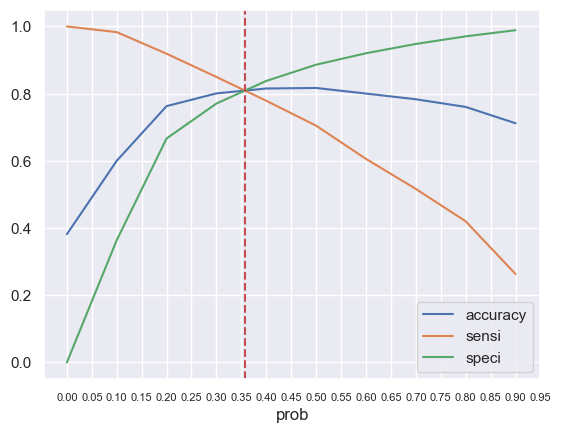

In [660]:
# Plotting accuracy, sensitivity and specificity for various probabilities:


#plt.figure(figsize=(20,5))
df_cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

In [ ]:
## From the curve above, it seems that 0.358 is optimal cutoff point to take.

In [661]:
# Let us Calculate 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [662]:
# Dropping the unnecessary columns:

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [663]:
#Displaying the head:

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.053608          302                0
1          0        0.022650         6087                0
2          0        0.222715         1033                0
3          0        0.158289         7656                0
4          1        0.754615         3241                1

In [ ]:
# Based to prediction let us Assign lead score to the leads based.

In [664]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' :

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [665]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.053608          302                0           5
1          0        0.022650         6087                0           2
2          0        0.222715         1033                0          22
3          0        0.158289         7656                0          16
4          1        0.754615         3241                1          75

In [ ]:
# STEP 9: MODEL EVALUATION:
## CONFUSION MATRIX

In [666]:
#Importing 'metrics' library:

from sklearn import metrics

# Confusion matrix:

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion_matrix)

[[3193  742]
 [ 474 1954]]


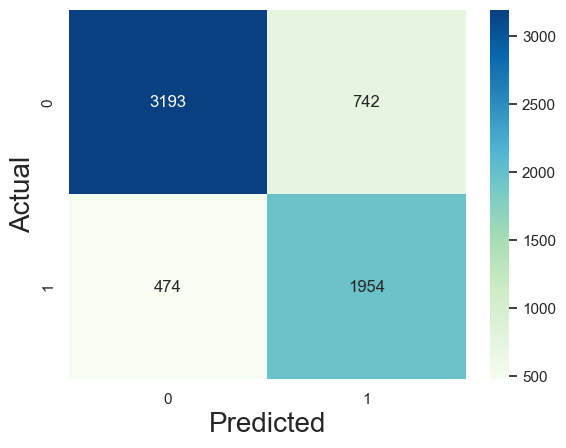

In [667]:
#Importing library to plot confusion matrix:
from sklearn.metrics import plot_confusion_matrix

# Plotting confusion matrix:-
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [ ]:
# Actual/Predicted         not_converted   converted
        # not_converted        3170          765
        # converted            463          1965 

In [668]:
# Check the overall accuracy:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8088951752318089

In [670]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [671]:
# Now let us check the sensitivity of our logistic regression model:

TP / float(TP+FN)

0.8047775947281713

In [672]:
# Let us Calculate specificity:

TN / float(TN+FP)

0.8114358322744599

In [673]:
# Calculate False Postive Rate (Predicting conversion when customer does not have convert):

print(FP/ float(TN+FP))

0.18856416772554002


In [674]:
# The Positive predictive value :

print (TP / float(TP+FP))

0.7247774480712166


In [675]:
# The Negative predictive value:

print (TN / float(TN+ FN))

0.8707390237251159


In [ ]:
# PRECISION AND RECALL

In [679]:
## Precision: (TP / TP + FP)

In [678]:
confusion_matrix[1,1]/(confusion_matrix[0,1]+confusion_matrix[1,1])

0.7247774480712166

In [ ]:
## Recall: (TP / TP + FN)

In [680]:
confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])

0.8047775947281713

In [ ]:
### Using sklearn utilities for the same:

In [682]:
#Importing 'precision_score' and 'recall_score':_

from sklearn.metrics import precision_score, recall_score

In [683]:
# Calculating Precision value:

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7247774480712166

In [684]:
#Calculating Recall value:

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8047775947281713

In [ ]:
# OBSERVATION: 
## We have the following values for the Train Data:
### Accuracy : 80%
### Sensitivity : 80%
### Specificity : 81%
### Pricision: 72%
### Recall: 80%

In [ ]:
# STEP 10: Plotting the ROC Curve.
## ROC curve will help in demonstrating the following:
## a. It will show the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
## b. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
## c. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [685]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [686]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

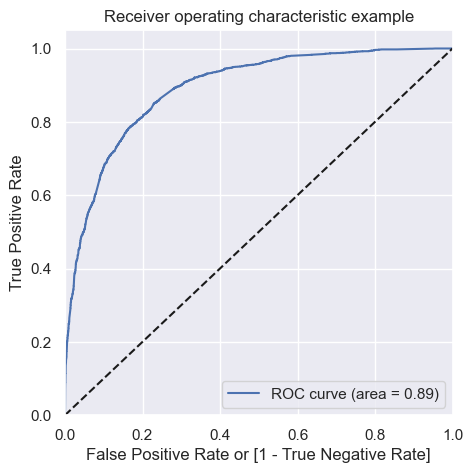

In [687]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [ ]:
# OBSERVATION: We are getting a good value of 0.89 indicating a good predictive model(As ROC Curve should be a value close to 1).

In [ ]:
# Precision and recall tradeoff

In [688]:
# Importing required library for 'precision_recall_curve' :

from sklearn.metrics import precision_recall_curve

In [689]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

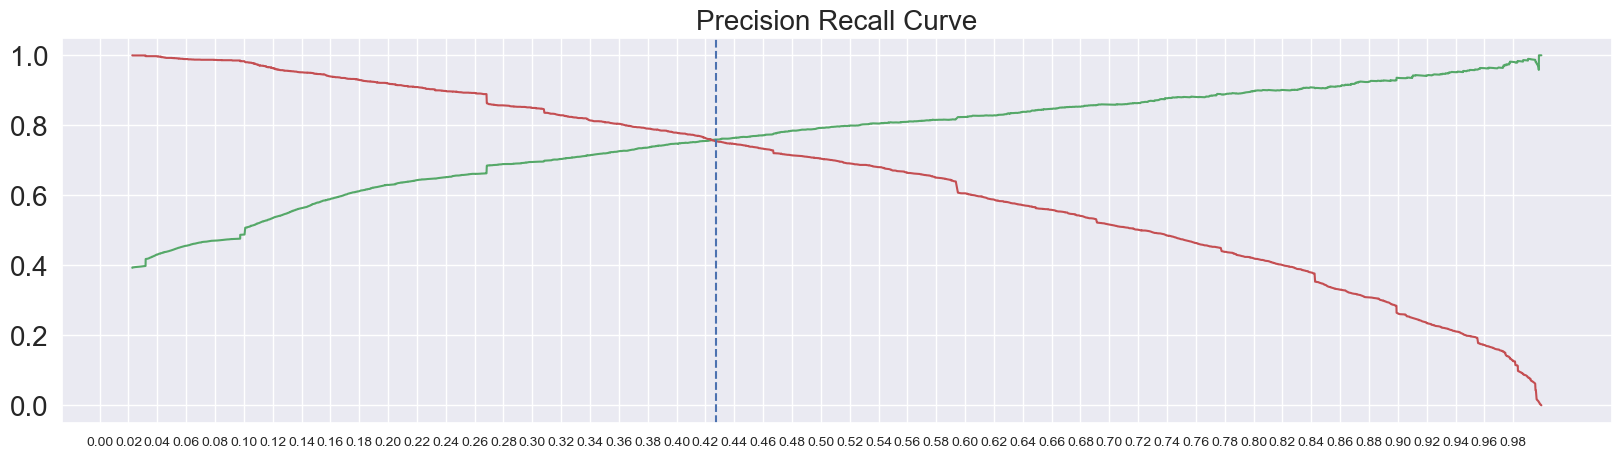

In [690]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

In [ ]:
# OBSERVATION: From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

In [ ]:
# Let us now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation:

In [691]:
# plotting the Train dataset again with 0.427 as cutoff:

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  final_predicted_2
0          0        0.053608          302                0           5                  0
1          0        0.022650         6087                0           2                  0
2          0        0.222715         1033                0          22                  0
3          0        0.158289         7656                0          16                  0
4          1        0.754615         3241                1          75                  1

In [692]:
# Confusion matrix:

confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_matrix2)

[[3355  580]
 [ 597 1831]]


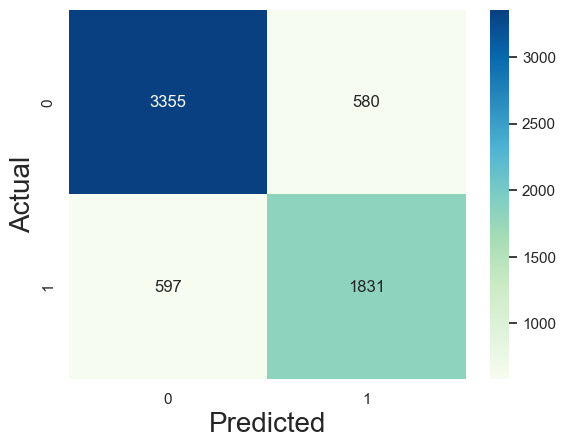

In [693]:
# Plotting confusion matrix:
sns.heatmap(confusion_matrix2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [694]:
# Check the overall accuracy:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.815024359578815

In [695]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

In [696]:
# Checking the sensitivity of our logistic regression model:

TP / float(TP+FN)

0.7541186161449753

In [697]:
# Calculating specificity:

TN / float(TN+FP)

0.8526048284625158

In [698]:
# positive predictive value :

print (TP / float(TP+FP))

0.7594359187059312


In [699]:
# Negative predictive value:

print (TN / float(TN+ FN))

0.8489372469635628


In [700]:
# Pricision:

confusion_matrix2[1,1]/(confusion_matrix2[0,1]+confusion_matrix2[1,1])

0.7594359187059312

In [701]:
# Calculating 'Recall' :

confusion_matrix2[1,1]/(confusion_matrix2[1,0]+confusion_matrix2[1,1])

0.7541186161449753

In [ ]:
# OBSERVATION:
# By using the Precision - Recall trade off curve cut off point True Positive number has decrease and True Negative number has increase
# Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive so 'Recall'/'sensitivity' decreased for this point We have to increase Sensitivity Recall value to increase True Positives. 
# Thus we will use 0.358 as optimal cutoff point.

In [ ]:
# STEP 11: Making predictions on the test set

In [702]:
# Applying 'transform' to scale the 'test' data set:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [703]:
# Predicting using values used by the final model i.e. logm3:

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 6906 to 6219
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2727 non-null   float64
 1   Lead Origin_Landing Page Submission                   2727 non-null   uint8  
 2   Lead Origin_Lead Add Form                             2727 non-null   uint8  
 3   Lead Source_Olark Chat                                2727 non-null   uint8  
 4   Lead Source_Welingak Website                          2727 non-null   uint8  
 5   Last Activity_Olark Chat Conversation                 2727 non-null   uint8  
 6   Last Activity_SMS Sent                                2727 non-null   uint8  
 7   Last Activity_Unsubscribed                            2727 non-null   uint8  
 8   What is your current occupation_Other                 2

In [ ]:
# Making Predictions on the X_test dataset using the final model

In [704]:
# Predicting on test data set using final model :

y_test_pred = logm3.predict(X_test)

In [705]:
# Checking top 10 rows:

y_test_pred[:10]

6906    0.901953
1873    0.214864
771     0.111243
4495    0.131265
9061    0.538928
4929    0.506070
2308    0.066402
1034    0.104615
9033    0.110605
7008    0.913941
dtype: float64

In [707]:
# Converting y_test_pred to a dataframe :

y_pred_1 = pd.DataFrame(y_test_pred)

In [708]:
# Let's see the head
y_pred_1.head()

0
6906  0.901953
1873  0.214864
771   0.111243
4495  0.131265
9061  0.538928

In [709]:
# Converting y_test to dataframe:

y_test_df = pd.DataFrame(y_test)

In [711]:
# Putting 'Prospect ID' to index:

y_test_df['Prospect ID'] = y_test_df.index

In [712]:
# Removing index for both dataframes to append them side by side :

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [714]:
# Appending y_test_df and y_pred_1:

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [715]:
# Displaying head of 'y_pred_final' :

y_pred_final.head()

Converted  Prospect ID         0
0          1         6906  0.901953
1          0         1873  0.214864
2          0          771  0.111243
3          0         4495  0.131265
4          1         9061  0.538928

In [716]:
# Renaming the column '0' as 'Converted_Prob':

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [717]:
# Rearranging the columns:

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [718]:
# Let's see the head of y_pred_final:

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         6906          1        0.901953
1         1873          0        0.214864
2          771          0        0.111243
3         4495          0        0.131265
4         9061          1        0.538928

In [719]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [720]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         6906          1        0.901953          90
1         1873          0        0.214864          21
2          771          0        0.111243          11
3         4495          0        0.131265          13
4         9061          1        0.538928          54

In [ ]:
# Using Cutoff point of 0.357 from Sentivity - Specificity - Accuracy plot cut-off point

In [721]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357:

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [722]:
# Displaying the head of 'y_pred_final' dataframe:

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         6906          1        0.901953          90                1
1         1873          0        0.214864          21                0
2          771          0        0.111243          11                0
3         4495          0        0.131265          13                0
4         9061          1        0.538928          54                1

In [ ]:
# Test model evaluation

In [723]:
# Checking the overall accuracy:

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8045471213788046

In [ ]:
# Confusion Matrix

In [724]:
# Calculating confusion matrix for test data:

confusion_matrix2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_matrix2

array([[1337,  323],
       [ 210,  857]], dtype=int64)

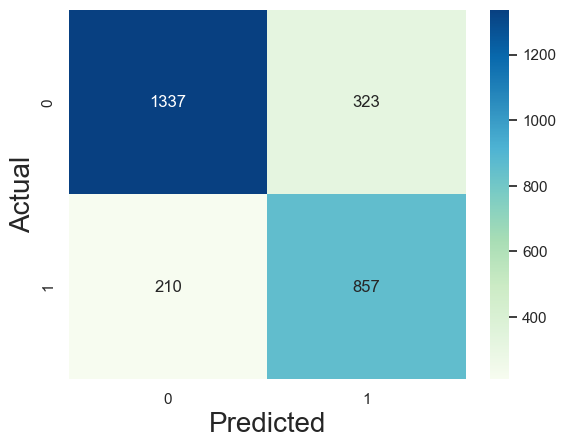

In [725]:
# Plotting confusion matrix:
sns.heatmap(confusion_matrix2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [726]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

In [727]:
# Let us see the sensitivity of our logistic regression model:

TP / float(TP+FN)

0.8031865042174321

In [728]:
# Let us calculate specificity:

TN / float(TN+FP)

0.805421686746988

In [729]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert:

print(FP/ float(TN+FP))

0.19457831325301206


In [730]:
# Positive predictive value :

print (TP / float(TP+FP))

0.726271186440678


In [731]:
# Negative predictive value:

print (TN / float(TN+ FN))

0.8642533936651584


In [ ]:
# Precision and Recall:

In [732]:
# Calculating 'precision_score':-

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.726271186440678

In [733]:
#Calculating 'recall_score':-

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8031865042174321

In [ ]:
# OBSERVATION:
# The sensitivity value for test data is 80% while for train data is also 80% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

In [734]:
# Determining top feature based on final model (logm5):
pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm3.params[1:]

Lead Origin_Landing Page Submission                    -0.87
Lead Origin_Lead Add Form                               2.98
Lead Source_Olark Chat                                  1.17
Lead Source_Welingak Website                            3.15
Last Activity_Olark Chat Conversation                  -1.22
Last Activity_SMS Sent                                  1.38
Last Activity_Unsubscribed                              1.45
What is your current occupation_Other                  -1.19
What is your current occupation_Working Professional    2.39
Specialization_Hospitality Management                  -0.96
Specialization_Other                                   -0.87
Do Not Email                                           -1.57
Total Time Spent on Website                             1.07
dtype: float64

In [735]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = logm3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin_Landing Page Submission                    -27.57
Lead Origin_Lead Add Form                               94.45
Lead Source_Olark Chat                                  37.13
Lead Source_Welingak Website                           100.00
Last Activity_Olark Chat Conversation                  -38.76
Last Activity_SMS Sent                                  43.83
Last Activity_Unsubscribed                              45.84
What is your current occupation_Other                  -37.68
What is your current occupation_Working Professional    75.88
Specialization_Hospitality Management                  -30.54
Specialization_Other                                   -27.62
Do Not Email                                           -49.87
Total Time Spent on Website                             34.00
dtype: float64

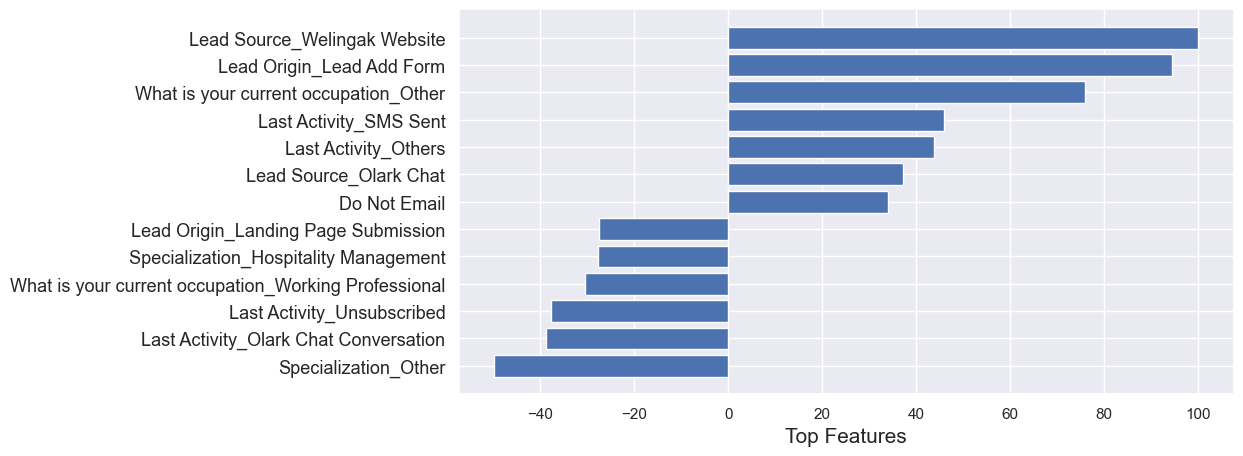

In [736]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

In [ ]:
# FINAL MODEL LINE EQUATION: 
## Converted = 0.261843 + 3.15 X Lead Source_Welingak Website + 2.98 X Lead Origin_Lead Add Form + 2.39 X What is your current occupation_Working Professional + 1.45 X Last Activity_Unsubscribed + 1.38 X Last Activity_SMS Sent + 1.17 X Lead Source_Olark Chat + 1.07 X Total Time Spent on Website - 0.87 X Lead Origin_Landing Page Submission - 0.87 X Specialization_Other - 0.96 X Specialization_Hospitality Management - 1.19 X What is your current occupation_Other - 1.22 X Last Activity_Olark Chat Conversation

In [ ]:
# FINAL OBSERVATION:

In [ ]:
# Evaluation Metrics for the train Dataset:
# A. Accuracy :0.80
# B. Sensitivity:~0.80
# C. Specificity:0.81
# D. Precision: 0.72
# E. Recall: 0.80

In [ ]:
# Evaluation Metrics for the test Dataset:
# A. Accuracy : 0.80
# B. Sensitivity: ~ 0.80
# C. Specificity: 0.80
# D. Precision: 0.72
# E. Recall: 0.80

In [ ]:
# RECOMMENDATION: 

In [ ]:
## To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :
## 1. Lead Source_Welingak Website : As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.
## 2. What is your current occupation_Working Professional : The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals nad try to get more number of leads.
## 3. Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause have a higher chances of getting converted.
## 4. Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.
## 5. Total Time Spent on website: Leads spending more time on website can be our potential lead.